In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [2]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [3]:
df_domclick = pd.read_csv("domclick/Москва_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3209 non-null   int64  
 1   region                         3209 non-null   object 
 2   address                        3209 non-null   object 
 3   latitude                       3209 non-null   float64
 4   longitude                      3209 non-null   float64
 5   price                          3209 non-null   object 
 6   house_floors                   3209 non-null   int64  
 7   house_buildYear                3209 non-null   object 
 8   house_ceilingHeight            3209 non-null   object 
 9   house_hasGarbageDisposer       2420 non-null   object 
 10  house_liftsFreight             2189 non-null   float64
 11  house_liftsPassenger           2572 non-null   float64
 12  house_wallType                 3143 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1912507562,Москва,"1-й Красногвардейский проезд, 15",55.750479,37.539527,68000000,75,2018,3.2,True,NaN,1.0,Монолитный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,0.0,108.0,15.0,80.0,50,2,undefined,0,NaN,Дизайнерский,NaN
1,1912507510,Москва,"Долгоруковская улица, 25к1",55.776305,37.601322,30500000,6,0,undefined,NaN,NaN,NaN,NaN,39.2,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2.0,39.2,8.0,15.0,2,1,undefined,0,NaN,Требует ремонта,NaN
2,1838388808,Москва,"1-й Смоленский переулок, 21",55.749334,37.579178,104900000,7,2015,undefined,True,1.0,1.0,NaN,110.5,NaN,60,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,4.0,110.0,20.0,0.0,5,3,undefined,1,NaN,Требует ремонта,NaN
3,1840286654,Москва,"улица Большая Полянка, 9",55.740294,37.617330,205875000,6,2021,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Центральное,5,A,5,Автоматическая,NaN,NaN,NaN,NaN,NaN,Центральное,Приточно-вытяжная,Свободная продажа,3.0,152.5,19.0,0.0,3,1,undefined,0,NaN,Дизайнерский,NaN
4,1885733273,Москва,"Мосфильмовская улица, 1Б",55.718010,37.525136,295544000,12,2021,undefined,NaN,NaN,1.0,Монолитный,NaN,NaN,15605.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,5.0,191.0,20.0,0.0,8,1,undefined,1,NaN,Требует ремонта,NaN


In [4]:
df_cian = pd.read_csv("cian/data_home_Moscow.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106565 entries, 0 to 106564
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 106565 non-null  object 
 1   price                106565 non-null  int64  
 2   price_for_metr       106565 non-null  int64  
 3   floor_object         106565 non-null  int64  
 4   total_floors         106565 non-null  int64  
 5   type_of_home         106565 non-null  object 
 6   square_home          106565 non-null  float64
 7   live_square          106565 non-null  object 
 8   kitchen_square       106565 non-null  object 
 9   height_ceiling       106565 non-null  object 
 10  bathroom             106565 non-null  object 
 11  balcony              106565 non-null  object 
 12  repair               106565 non-null  object 
 13  yer_home             106565 non-null  object 
 14  garbage_chute        106565 non-null  object 
 15  type_home        

In [5]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1-комн. апартаменты,1300000,91549,1,5,Вторичка Апартаменты,14.2,Null,Null,2.6,1,Null,Без ремонта,1956,Null,Null,Железобетонные,3,Центральное,Нет,Центральное,Null,Null,"Москва, ЗАО, р-н Очаково-Матвеевское, 1-й Очак...",https://www.cian.ru/sale/flat/294196707/
1,1/6 квартиры,1300000,28261,9,17,Вторичка,75.1,46.0,10.0,2.64,1,1,Косметический,1983,Да,Панельный,Железобетонные,6,Центральное,Нет,Null,Null,2,"Москва, ЮАО, р-н Бирюлево Восточное, Липецкая ...",https://www.cian.ru/sale/flat/293343840/
2,1/6 квартиры,1200000,26786,9,9,Вторичка,44.8,Null,Null,2.64,1,1,Косметический,1970,Да,Панельный,Железобетонные,7,Центральное,Нет,Центральное,Null,1,"Москва, ВАО, р-н Гольяново, Щелковское ш., 87К1",https://www.cian.ru/sale/flat/292881360/
3,1/4 квартиры,1500000,50000,2,5,Вторичка,43.6,30.0,6.0,Null,1,1,Косметический,1964,Null,Null,Нет информации,4,Центральное,Нет,Центральное,Null,Null,"Москва, ЗАО, р-н Внуково, Центральная ул., 13",https://www.cian.ru/sale/flat/289254012/
4,1/4 квартиры,1590000,34565,11,12,Вторичка,46.0,30.0,6.7,2.5,1,1,Без ремонта,1975,Да,Панельный,Железобетонные,6,Центральное,Нет,Null,Null,2,"Москва, ЮАО, р-н Орехово-Борисово Северное, Бо...",https://www.cian.ru/sale/flat/294197545/


# Подготовка данных

In [6]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [7]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3209 non-null   int64  
 1   region                         3209 non-null   object 
 2   address                        3209 non-null   object 
 3   latitude                       3209 non-null   float64
 4   longitude                      3209 non-null   float64
 5   price                          3208 non-null   object 
 6   house_floors                   3209 non-null   int64  
 7   house_buildYear                3188 non-null   object 
 8   house_ceilingHeight            1807 non-null   object 
 9   house_hasGarbageDisposer       2420 non-null   object 
 10  house_liftsFreight             2189 non-null   float64
 11  house_liftsPassenger           2572 non-null   float64
 12  house_wallType                 3132 non-null   o

In [8]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72796 entries, 0 to 106564
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 72796 non-null  object 
 1   price                72796 non-null  int64  
 2   price_for_metr       72796 non-null  int64  
 3   floor_object         72796 non-null  int64  
 4   total_floors         72796 non-null  int64  
 5   type_of_home         72796 non-null  object 
 6   square_home          72796 non-null  float64
 7   live_square          57066 non-null  object 
 8   kitchen_square       57808 non-null  object 
 9   height_ceiling       58027 non-null  object 
 10  bathroom             54655 non-null  object 
 11  balcony              29639 non-null  object 
 12  repair               32965 non-null  object 
 13  yer_home             30118 non-null  object 
 14  garbage_chute        18103 non-null  object 
 15  type_home            66555 non-null  obj

In [9]:
df_cian['name'].unique()

array(['1-комн. апартаменты', '1/6 квартиры', '1/4 квартиры',
       'Апартаменты-студия', '1/3 квартиры', '1/18 квартиры',
       '1/5 квартиры', '1/2 квартиры', 'Студия', '7/32 квартиры',
       '7/20 квартиры', '2/3 квартиры', '1-комн. квартира', 'Доля',
       '2/9 квартиры', '95/100 квартиры', '48% квартиры',
       '2-комн. апартаменты', '90/1000 квартиры', '9/100 квартиры',
       '3-комн. квартира', '40% квартиры', '9/24 квартиры',
       '3/4 квартиры', '3/10 квартиры', '25% квартиры', '23% квартиры',
       '38% квартиры', '4-комн. квартира', '30/100 квартиры',
       '3/8 квартиры', '23/100 квартиры',
       'Апартаменты свободной планировки', '22/60 квартиры', '0',
       '50% квартиры', '11/18 квартиры', '2/5 квартиры',
       '19/100 квартиры', '28/100 квартиры', '8/19 квартиры',
       '7/12 квартиры', '5/8 квартиры', '2-комн. квартира',
       '7/16 квартиры', '5/12 квартиры', '65/100 квартиры',
       '4/9 квартиры', '27/100 квартиры', '5/9 квартиры', '7/15 квартиры',


In [10]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [11]:
df_cian['name'].unique()

array(['1-комн. апартаменты', 'Апартаменты-студия', 'Студия',
       '1-комн. квартира', '2-комн. апартаменты', '3-комн. квартира',
       '4-комн. квартира', '2-комн. квартира', '3-комн. апартаменты',
       '4-комн. апартаменты', '5-комн. апартаменты', '5-комн. квартира'],
      dtype=object)

In [12]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['1', '0', '2', '3', '4', '5'], dtype=object)

In [13]:
df_domclick['objectInfo_renovation'].unique()

array(['Дизайнерский', 'Требует ремонта', 'косметический', nan,
       'Косметический', 'Без ремонта', 'Евро', 'евроремонт',
       'Отсутствует', 'косметический ремонт', 'Хороший',
       'Авторский проект', 'no', 'С отделкой', 'Частичный ремонт'],
      dtype=object)

In [14]:
df_cian['repair'].unique()

array(['Без ремонта', nan, 'Евроремонт', 'Косметический', 'Дизайнерский'],
      dtype=object)

In [15]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [16]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [17]:
df_cian['repair'].unique()

array(['0', nan, '2', '1', '3'], dtype=object)

In [18]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '5', '1', nan, '0', '2', '9', '4', '10'], dtype=object)

In [19]:
df_domclick['house_wallType'].unique()

array(['Монолитный', nan, 'Железобетон', 'Кирпичный', 'Панельный',
       'Смешанные', 'Монолитно-кирпичный', 'Блочный', 'Иные',
       'Деревянный', 'Кирпично-монолитный', 'Железобетонная панель'],
      dtype=object)

In [20]:
df_cian['type_home'].unique()

array([nan, 'Монолитный', 'Кирпичный', 'Панельный', 'Блочный',
       'Монолитно-кирпичный', 'Газобетонный блок', 'Сталинский',
       'Газосиликатный блок', 'Старый фонд', 'Деревянный', 'Каркасный'],
      dtype=object)

In [21]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [22]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

In [23]:
df_domclick['house_wallType'].unique()

array(['3', nan, '7', '1', '0', '9', '4', '2', '5'], dtype=object)

In [24]:
df_cian['type_home'].unique()

array([nan, '3', '1', '0', '2', '4', '10', '11', '5', '6'], dtype=object)

In [25]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', 'Смешанные', nan, 'Деревянные'], dtype=object)

In [26]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', nan, 'Смешанный', 'Деревянный', 'Иное',
       'Монолитный', 'Бетонный'], dtype=object)

In [27]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [28]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [29]:
df_cian['type_of_overlap'].unique()

array(['0', '1', nan, '2'], dtype=object)

In [30]:
df_domclick['house_floorType'].unique()

array(['0', nan, '1', '2', '3', '4'], dtype=object)

In [31]:
df_cian['heating'].unique()

array(['Центральное', nan, 'Индивидуальный тепловой пункт',
       'Автономная котельная', 'Котел/Квартирное отопление', 'Нет',
       'Электрическое'], dtype=object)

In [32]:
df_domclick['house_heatingType'].unique()

array([nan, 'Центральное', 'Индивидуальный тепловой пункт (ИТП)',
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Квартирное отопление (квартирный котел)'], dtype=object)

In [33]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [34]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [35]:
df_domclick['house_heatingType'].unique()

array([nan, '0', '3', '2', '1'], dtype=object)

In [36]:
df_cian['heating'].unique()

array(['0', nan, '3', '2', '1', '5'], dtype=object)

In [37]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [38]:
df_domclick['objectInfo_hasGas'].unique()

array([nan, False, True], dtype=object)

In [39]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [40]:
df_cian['gas_supply'].unique()

array([ True, False])

<Axes: xlabel='accident_rate', ylabel='count'>

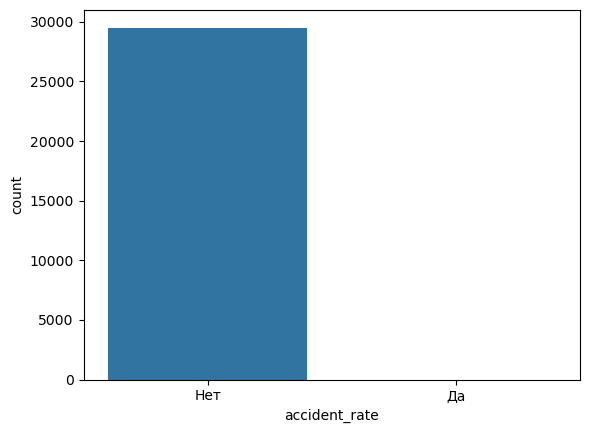

In [41]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

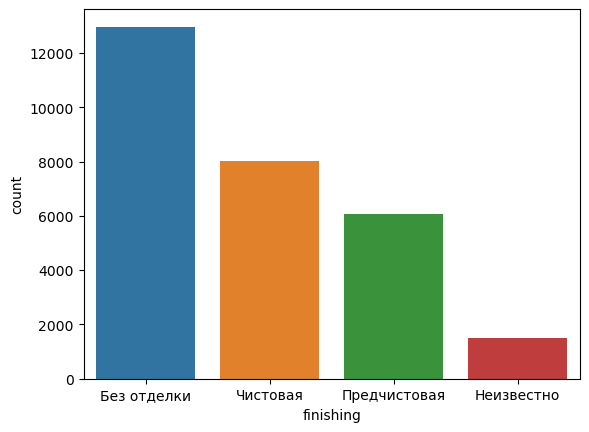

In [42]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

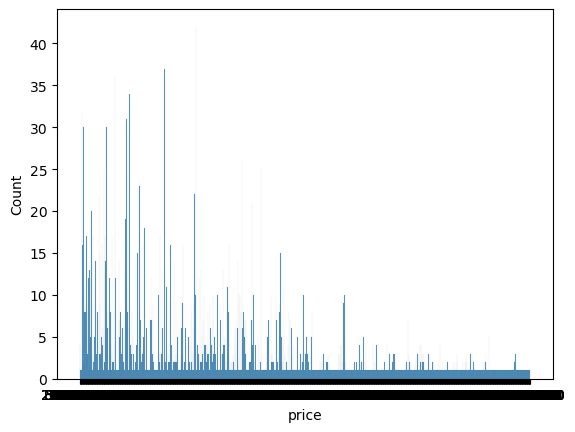

In [43]:
sns.histplot(data = df_domclick, x = 'price')

In [44]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

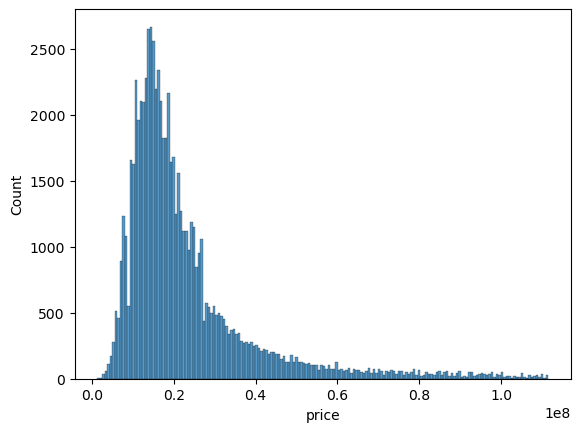

In [45]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

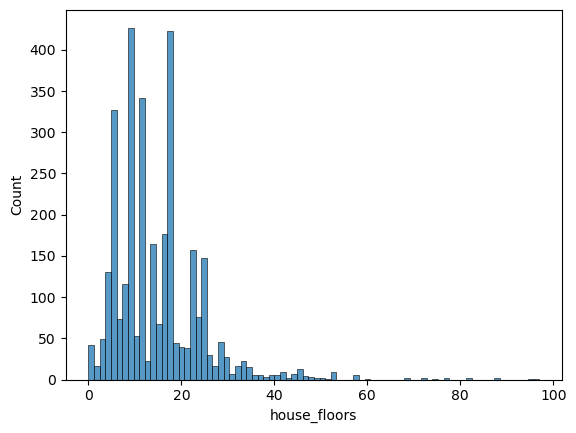

In [46]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

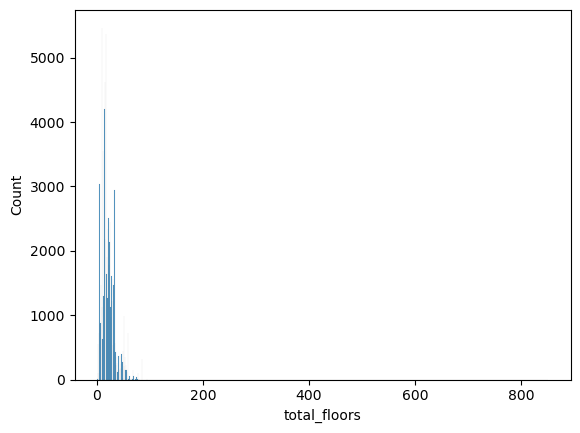

In [47]:
sns.histplot(data = df_cian, x = 'total_floors')

In [48]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
65895,3-комн. квартира,18300000,234315,6,202,Вторичка,78.1,43.0,23.5,NaN,2,2,2,NaN,NaN,0,NaN,NaN,NaN,NaN,False,NaN,4,"Москва, НАО (Новомосковский), Сосенское поселе...",https://www.cian.ru/sale/flat/288064831/,3
103347,4-комн. квартира,63000000,588785,12,851,Вторичка,107.0,NaN,15.0,3.0,NaN,NaN,3,2020,Нет,3,0,3,3,Нет,False,NaN,4,"Москва, ЗАО, р-н Раменки, Мичуринский просп., 56",https://www.cian.ru/sale/flat/294418662/,4


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

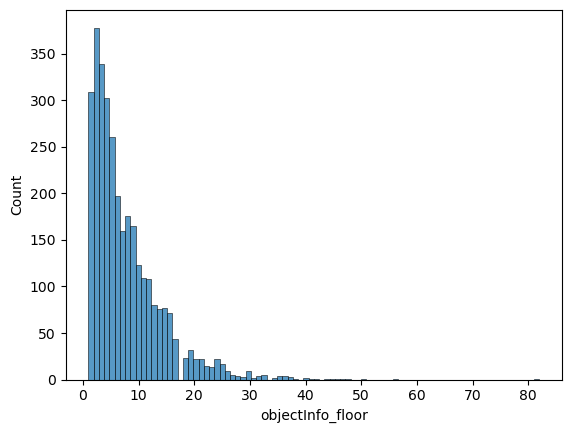

In [49]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

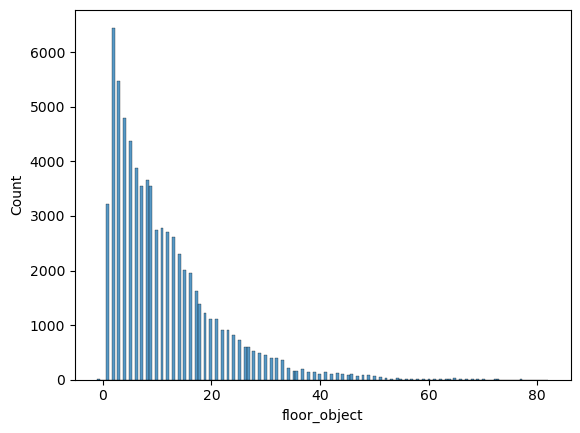

In [50]:
sns.histplot(data = df_cian, x = 'floor_object')

In [51]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
45,1-комн. апартаменты,2730000,118182,-1,4,Вторичка Апартаменты,23.1,8.3,9.8,NaN,1,NaN,1,2012,NaN,3,0,1,0,Нет,False,NaN,NaN,"Москва, ТАО (Троицкий), Первомайское поселок, ...",https://www.cian.ru/sale/flat/284875990/,1
140,Апартаменты-студия,3600000,189474,-1,5,Вторичка Апартаменты,19.0,12.0,2.0,NaN,1,NaN,2,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Москва, ЗАО, р-н Очаково-Матвеевское, Рябинова...",https://www.cian.ru/sale/flat/292665419/,0
181,Апартаменты-студия,3610000,190000,-1,5,Вторичка Апартаменты,19.0,12.0,2.0,NaN,1,NaN,2,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Москва, ЗАО, р-н Очаково-Матвеевское, Рябинова...",https://www.cian.ru/sale/flat/292665408/,0
342,Апартаменты-студия,4200000,291667,-1,5,Вторичка Апартаменты,14.4,7.9,1.5,2.7,1,NaN,2,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Москва, ЮАО, р-н Даниловский, Автозаводская ул...",https://www.cian.ru/sale/flat/293435966/,0
3744,2-комн. апартаменты,6950000,193056,-1,6,Вторичка Апартаменты,36.0,25.0,6.0,2.3,1,NaN,2,1928,NaN,2,1,3,0,Нет,True,NaN,NaN,"Москва, ВАО, р-н Сокольники, Малая Остроумовск...",https://www.cian.ru/sale/flat/293986944/,2
24182,2-комн. апартаменты,11000000,261905,-1,6,Вторичка Апартаменты,42.0,28.0,6.0,2.8,1,NaN,2,1960,NaN,NaN,NaN,4,0,Нет,True,NaN,NaN,"Москва, ЗАО, р-н Филевский парк, Минская ул., 8К1",https://www.cian.ru/sale/flat/293808916/,2


<Axes: xlabel='objectInfo_area', ylabel='Count'>

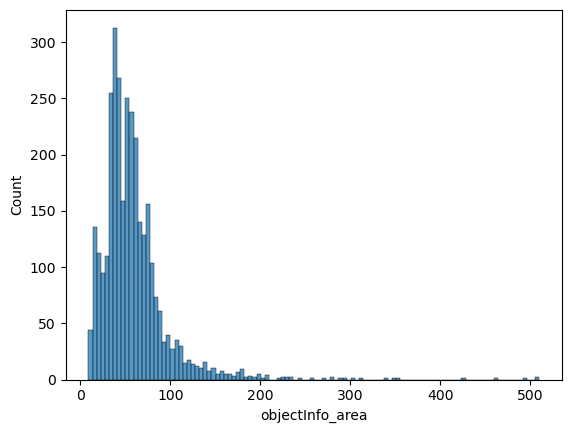

In [52]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

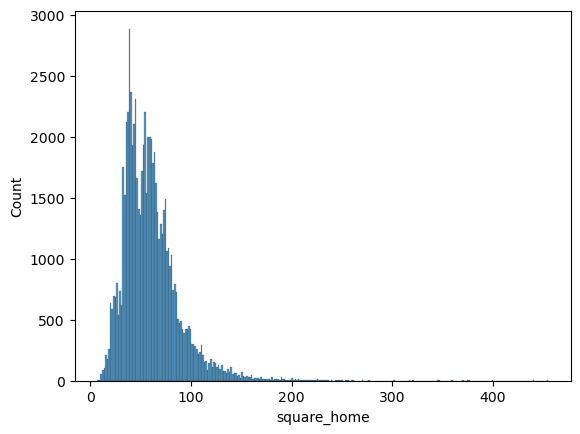

In [53]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

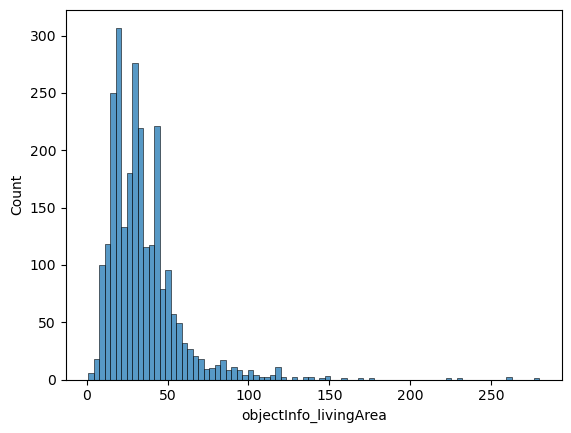

In [54]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

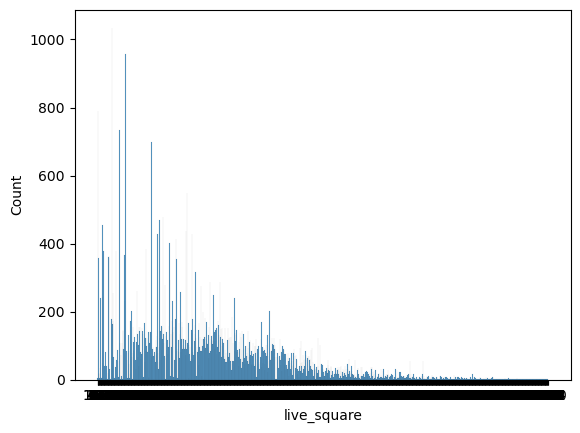

In [55]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

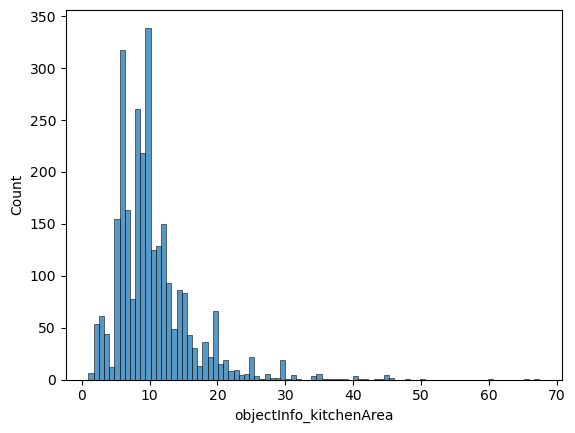

In [56]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

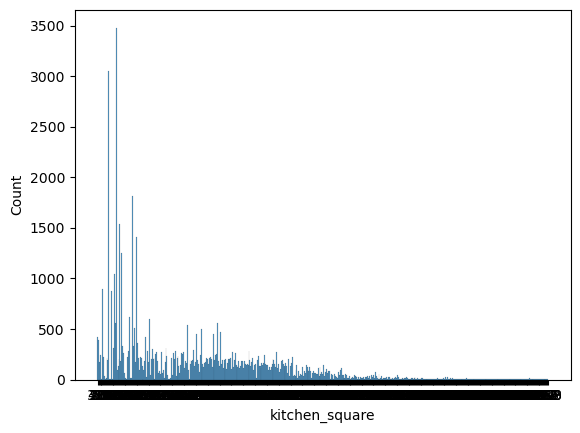

In [57]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

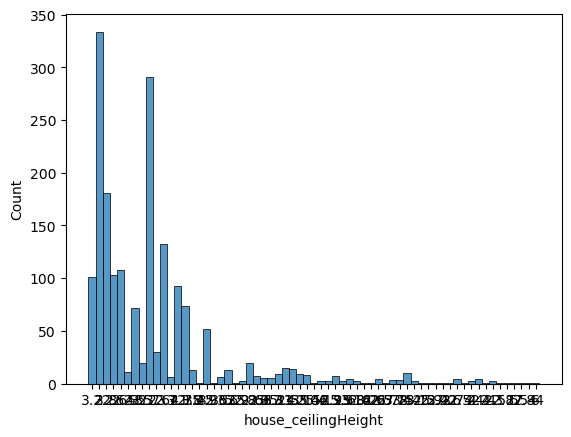

In [58]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

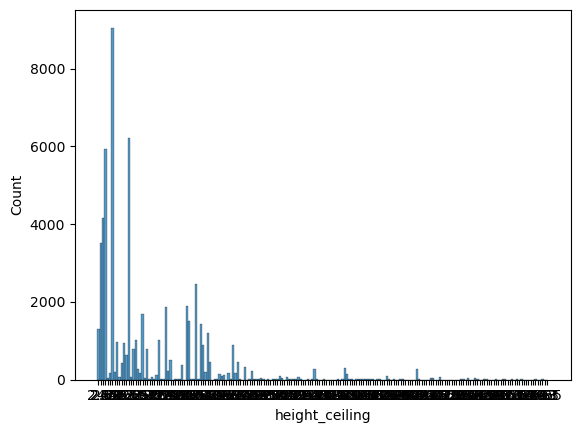

In [59]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

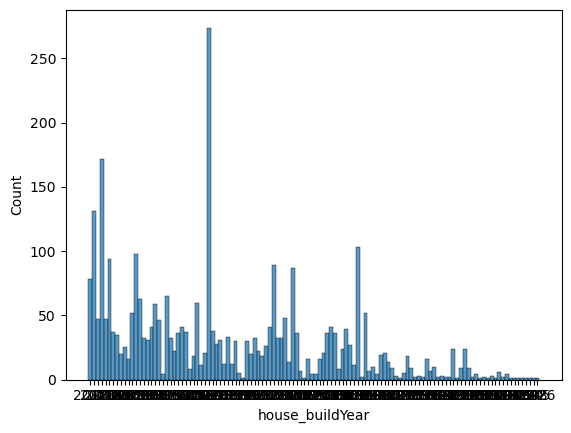

In [60]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

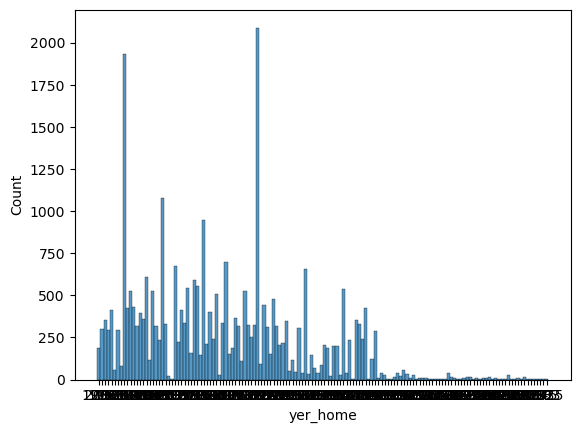

In [61]:
sns.histplot(data = df_cian, x = 'yer_home')

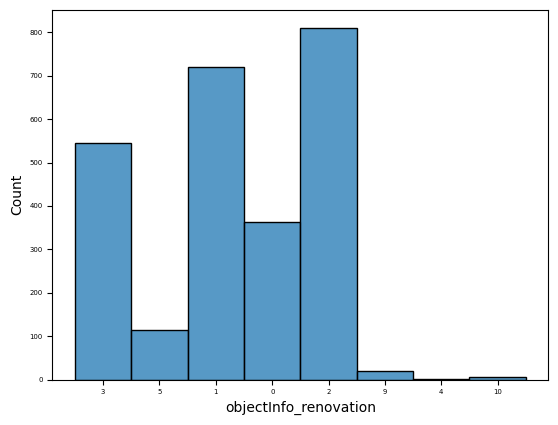

In [62]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [63]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '5', '1', nan, '0', '2', '9', '4', '10'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

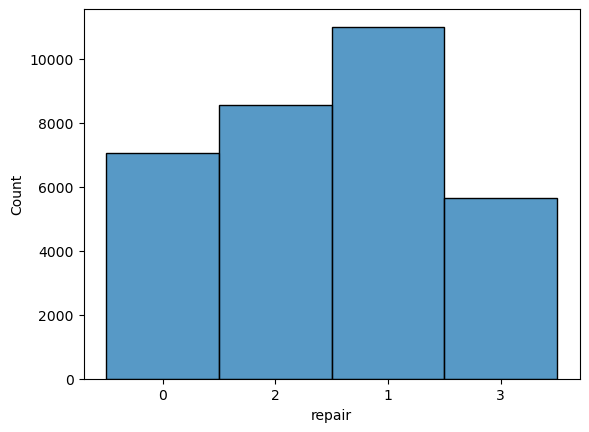

In [64]:
sns.histplot(data = df_cian, x = 'repair')

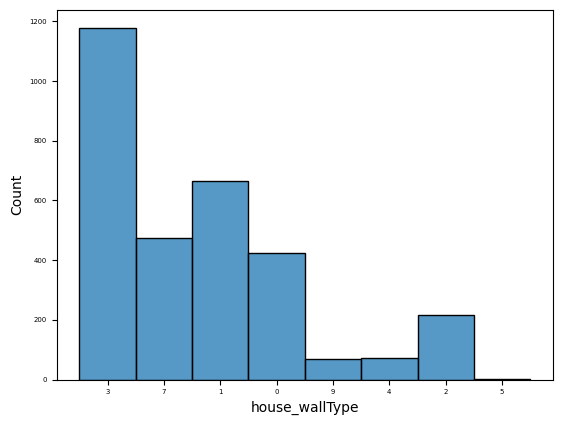

In [65]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [66]:
df_domclick['house_wallType'].unique()

array(['3', nan, '7', '1', '0', '9', '4', '2', '5'], dtype=object)

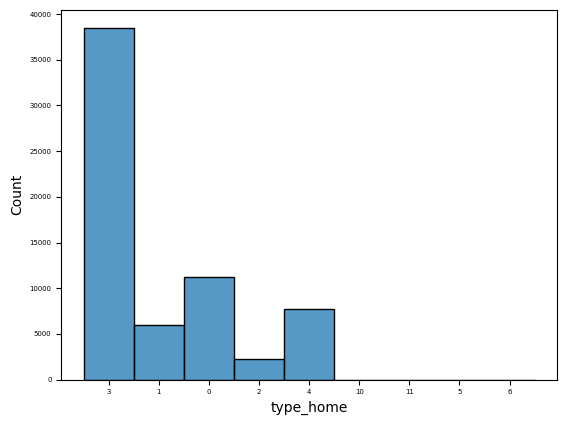

In [67]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [68]:
df_cian['type_home'].unique()

array([nan, '3', '1', '0', '2', '4', '10', '11', '5', '6'], dtype=object)

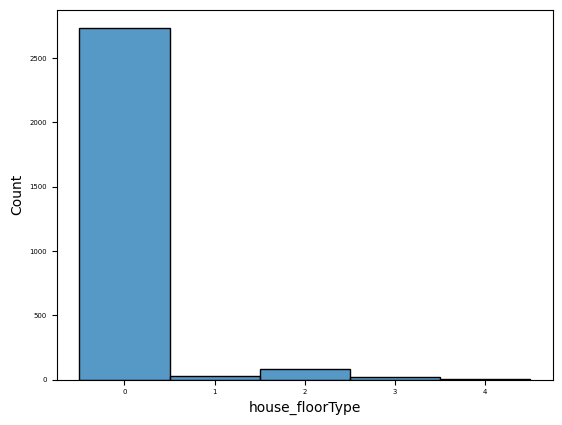

In [69]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [70]:
df_domclick['house_floorType'].unique()

array(['0', nan, '1', '2', '3', '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

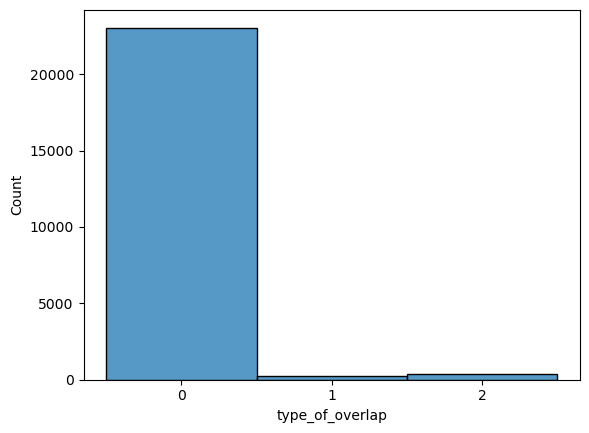

In [71]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

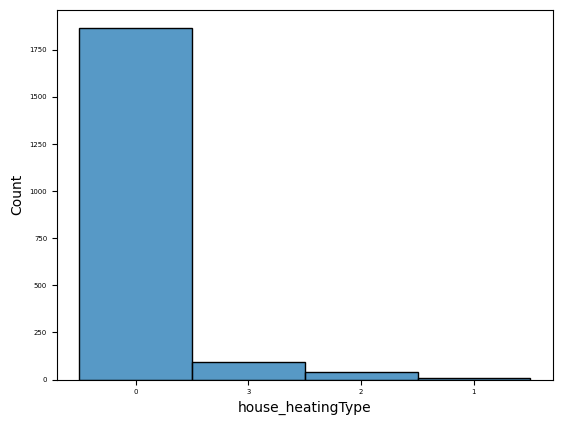

In [72]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [73]:
df_domclick['house_heatingType'].unique()

array([nan, '0', '3', '2', '1'], dtype=object)

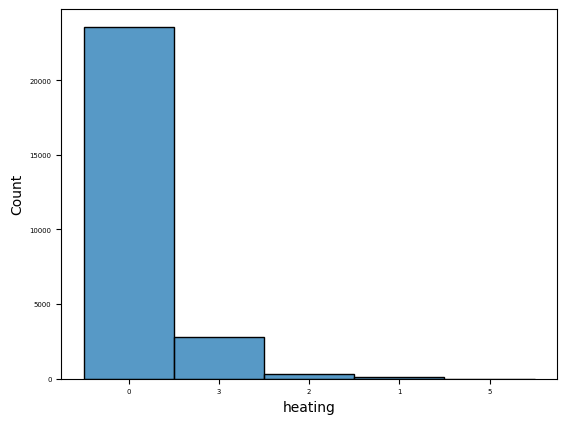

In [74]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [75]:
df_cian['heating'].unique()

array(['0', nan, '3', '2', '1', '5'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

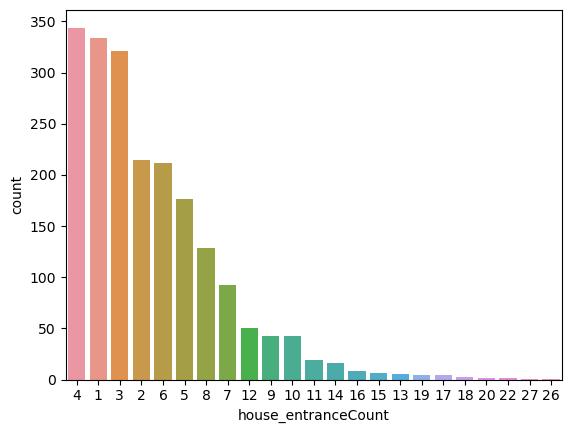

In [76]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

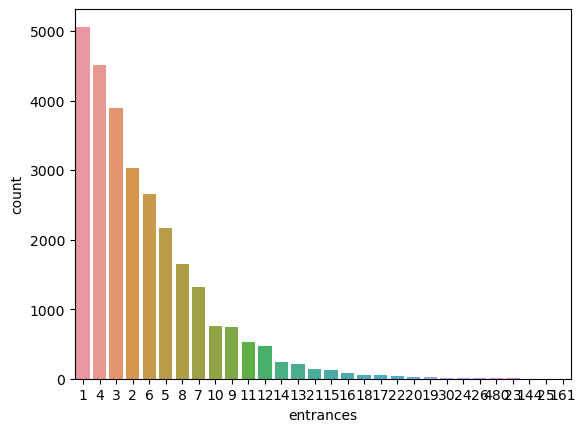

In [77]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

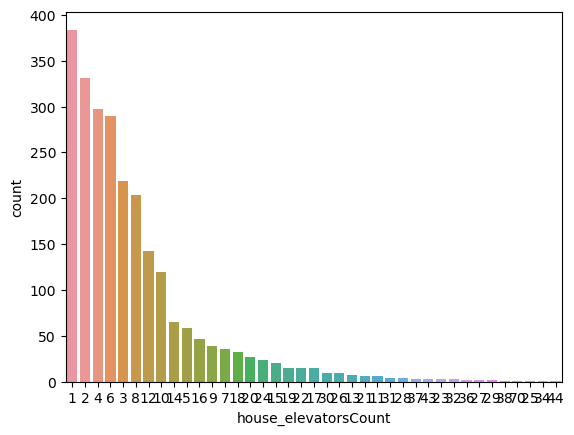

In [78]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

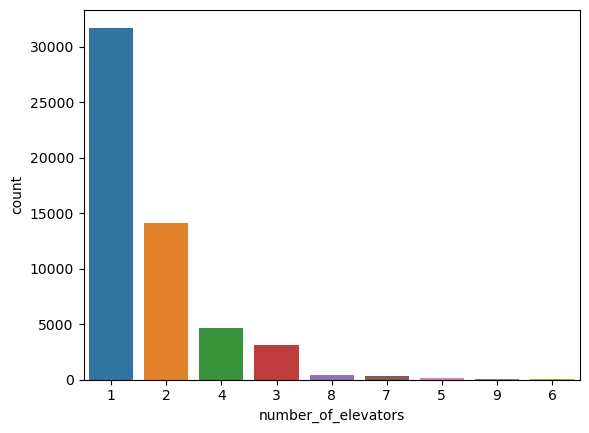

In [79]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [80]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   object 
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   object 
 5   house_ceilingHeight            1807 non-null   object 
 6   house_hasGarbageDisposer       2420 non-null   object 
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3100 non-null   object 
 10  house_areaNonResidential       2016 non-null   object 
 11  house_basementArea             1999 non-null   object 
 12  house_chuteCount               1602 non-null   o

In [81]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   object 
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   object 
 5   house_ceilingHeight            1807 non-null   object 
 6   house_hasGarbageDisposer       2420 non-null   float64
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3100 non-null   object 
 10  house_areaNonResidential       2016 non-null   object 
 11  house_basementArea             1999 non-null   object 
 12  house_chuteCount               1602 non-null   o

In [82]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [83]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   float64
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   float64
 5   house_ceilingHeight            1807 non-null   float64
 6   house_hasGarbageDisposer       2420 non-null   float64
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3100 non-null   float64
 10  house_areaNonResidential       2016 non-null   float64
 11  house_basementArea             1999 non-null   float64
 12  house_chuteCount               1602 non-null   f

In [84]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71963 entries, 0 to 106564
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                71963 non-null  int64  
 1   price_for_metr       71963 non-null  int64  
 2   floor_object         71963 non-null  int64  
 3   total_floors         71963 non-null  int64  
 4   type_of_home         71963 non-null  object 
 5   square_home          71963 non-null  float64
 6   live_square          56539 non-null  object 
 7   kitchen_square       57209 non-null  object 
 8   height_ceiling       57448 non-null  object 
 9   bathroom             53994 non-null  object 
 10  balcony              29219 non-null  object 
 11  repair               32227 non-null  object 
 12  yer_home             29486 non-null  object 
 13  garbage_chute        17760 non-null  object 
 14  type_home            65853 non-null  object 
 15  type_of_overlap      23651 non-null  obj

In [85]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71963 entries, 0 to 106564
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                71963 non-null  int64  
 1   price_for_metr       71963 non-null  int64  
 2   floor_object         71963 non-null  int64  
 3   total_floors         71963 non-null  int64  
 4   type_of_home         71963 non-null  float64
 5   square_home          71963 non-null  float64
 6   live_square          56539 non-null  object 
 7   kitchen_square       57209 non-null  object 
 8   height_ceiling       57448 non-null  object 
 9   bathroom             53994 non-null  object 
 10  balcony              29219 non-null  object 
 11  repair               32227 non-null  object 
 12  yer_home             29486 non-null  object 
 13  garbage_chute        17760 non-null  float64
 14  type_home            65853 non-null  object 
 15  type_of_overlap      23651 non-null  obj

In [86]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [87]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 71963 entries, 0 to 106564
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                71963 non-null  int64  
 1   price_for_metr       71963 non-null  int64  
 2   floor_object         71963 non-null  int64  
 3   total_floors         71963 non-null  int64  
 4   type_of_home         71963 non-null  float64
 5   square_home          71963 non-null  float64
 6   live_square          56539 non-null  float64
 7   kitchen_square       57209 non-null  float64
 8   height_ceiling       57448 non-null  float64
 9   bathroom             53994 non-null  float64
 10  balcony              29219 non-null  float64
 11  repair               32227 non-null  float64
 12  yer_home             29486 non-null  float64
 13  garbage_chute        17760 non-null  float64
 14  type_home            65853 non-null  float64
 15  type_of_overlap      23651 non-null  flo

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1300000,91549,1,5,1.0,14.2,NaN,NaN,2.6,1.0,NaN,0.0,1956.0,NaN,NaN,0.0,3.0,0.0,1.0,NaN,NaN,1
5,1550000,86111,1,3,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,3.0,1.0,4.0,0.0,0.0,NaN,NaN,0
9,1800000,120000,1,2,1.0,15.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0
10,1800000,144000,1,5,1.0,12.5,4.5,3.0,2.8,1.0,NaN,0.0,1961.0,NaN,NaN,0.0,4.0,0.0,1.0,NaN,NaN,0
17,2069000,99952,1,16,1.0,20.7,19.0,NaN,2.7,1.0,NaN,0.0,2001.0,1.0,3.0,0.0,5.0,3.0,0.0,NaN,2.0,0


In [88]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   float64
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   float64
 5   house_ceilingHeight            1807 non-null   float64
 6   house_hasGarbageDisposer       2420 non-null   float64
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3100 non-null   float64
 10  house_areaNonResidential       2016 non-null   float64
 11  house_basementArea             1999 non-null   float64
 12  house_chuteCount               1602 non-null   f

# Соединение датасетов

In [89]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [90]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [91]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array([nan, '1', '0', '3', '2', '5'], dtype=object)

In [92]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

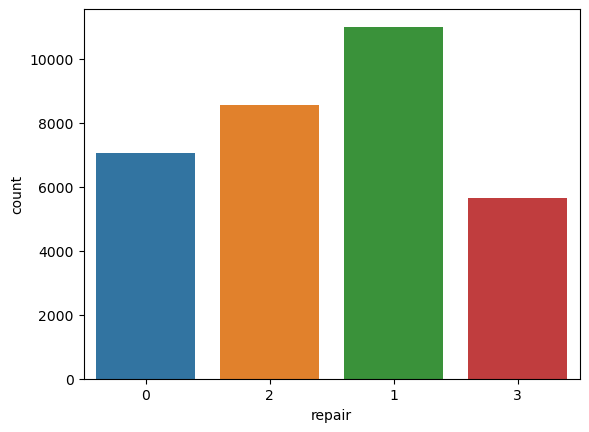

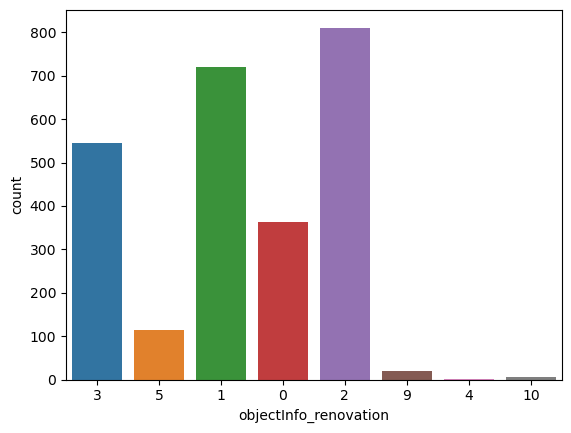

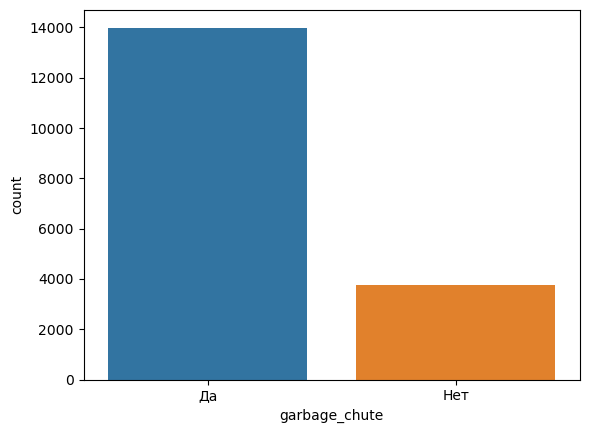

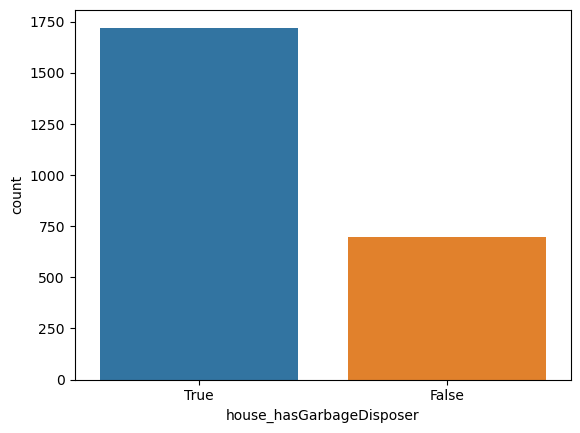

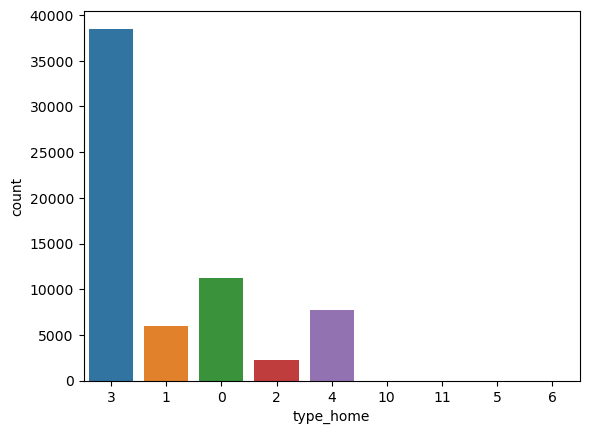

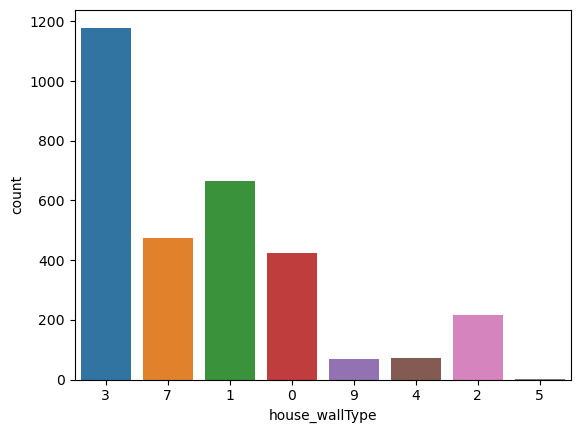

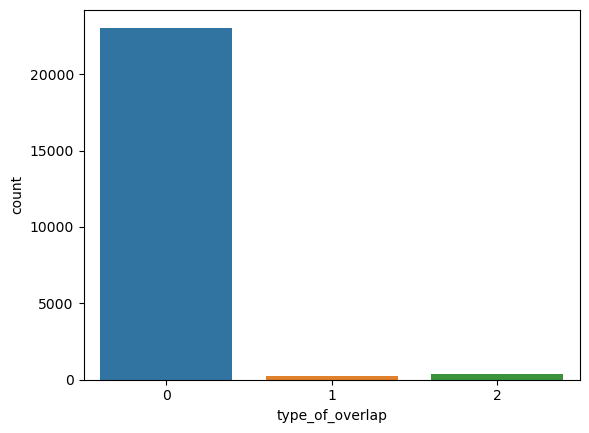

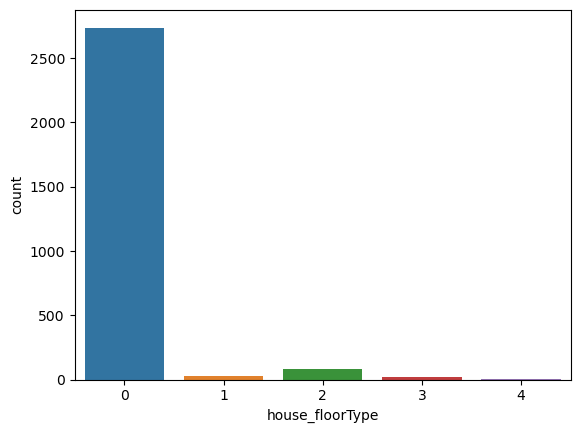

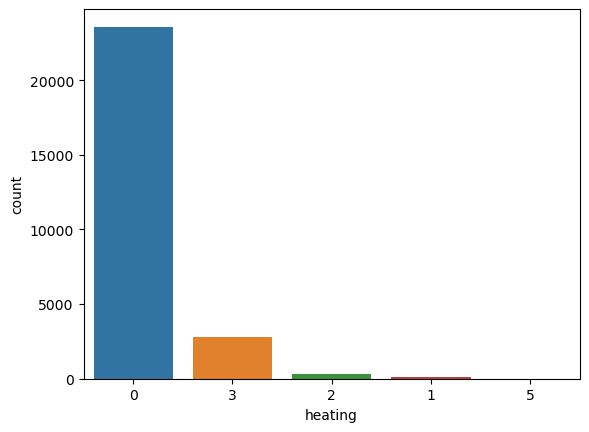

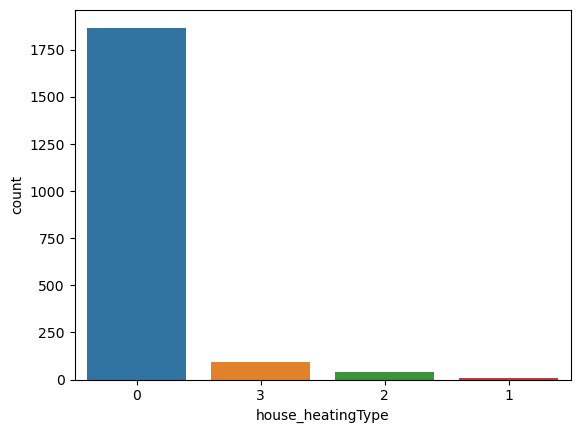

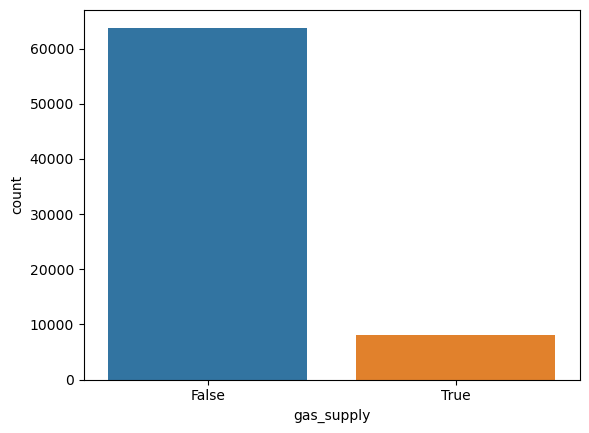

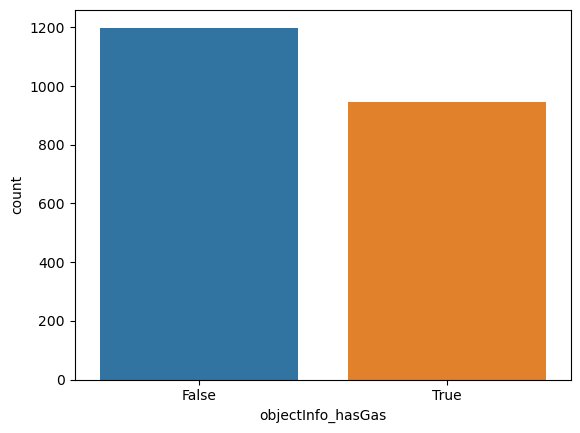

<Figure size 640x480 with 0 Axes>

In [93]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [94]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [95]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [96]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3208 non-null   float64
 1   room_count       3208 non-null   float64
 2   floor            3209 non-null   int64  
 3   totalFloors      3209 non-null   int64  
 4   area             3209 non-null   float64
 5   kitchenArea      2784 non-null   float64
 6   livingArea       2571 non-null   float64
 7   ceilingHeight    1807 non-null   float64
 8   bathroomCount    1848 non-null   float64
 9   balconyCount     3209 non-null   int64  
 10  repairType       2581 non-null   float64
 11  buildYear        3188 non-null   float64
 12  hasGarbageChute  2420 non-null   float64
 13  wallType         3100 non-null   float64
 14  floorType        2872 non-null   float64
 15  entranceCount    2030 non-null   float64
 16  heatingType      2006 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,68000000.0,0.0,50,75,108.0,15.0,80.0,3.2,NaN,0,3.0,2018.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN
1,30500000.0,2.0,2,6,39.2,8.0,15.0,NaN,NaN,0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104900000.0,4.0,5,7,110.0,20.0,NaN,NaN,NaN,1,5.0,2015.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,205875000.0,3.0,3,6,152.5,19.0,NaN,NaN,NaN,0,3.0,2021.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0
4,295544000.0,5.0,8,12,191.0,20.0,NaN,NaN,NaN,1,5.0,2021.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN


In [97]:
merge_domclick['repairType'].unique()

array([ 3.,  5.,  1., nan,  0.,  2.,  9.,  4., 10.])

In [98]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71963 entries, 0 to 71962
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            71963 non-null  int64  
 1   room_count       71963 non-null  int64  
 2   floor            71963 non-null  int64  
 3   totalFloors      71963 non-null  int64  
 4   area             71963 non-null  float64
 5   kitchenArea      57209 non-null  float64
 6   livingArea       56539 non-null  float64
 7   ceilingHeight    57448 non-null  float64
 8   bathroomCount    53994 non-null  float64
 9   balconyCount     29219 non-null  float64
 10  repairType       32227 non-null  float64
 11  buildYear        29486 non-null  float64
 12  hasGarbageChute  17760 non-null  float64
 13  wallType         65853 non-null  float64
 14  floorType        23651 non-null  float64
 15  entranceCount    27840 non-null  float64
 16  heatingType      26837 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1300000,1,1,5,14.2,NaN,NaN,2.6,1.0,NaN,0.0,1956.0,NaN,NaN,0.0,3.0,0.0,1.0,NaN
1,1550000,0,1,3,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,3.0,1.0,4.0,0.0,0.0,NaN
2,1800000,0,1,2,15.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
3,1800000,0,1,5,12.5,3.0,4.5,2.8,1.0,NaN,0.0,1961.0,NaN,NaN,0.0,4.0,0.0,1.0,NaN
4,2069000,0,1,16,20.7,NaN,19.0,2.7,1.0,NaN,0.0,2001.0,1.0,3.0,0.0,5.0,3.0,0.0,2.0


In [99]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [100]:
df_combined = df_combined.drop_duplicates()

In [101]:
df_combined.reset_index(drop = True, inplace=True)

In [102]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74983 entries, 0 to 74982
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            74982 non-null  float64
 1   room_count       74982 non-null  float64
 2   floor            74983 non-null  int64  
 3   totalFloors      74983 non-null  int64  
 4   area             74983 non-null  float64
 5   kitchenArea      59843 non-null  float64
 6   livingArea       58954 non-null  float64
 7   ceilingHeight    59106 non-null  float64
 8   bathroomCount    55693 non-null  float64
 9   balconyCount     32343 non-null  float64
 10  repairType       34748 non-null  float64
 11  buildYear        32616 non-null  float64
 12  hasGarbageChute  20161 non-null  float64
 13  wallType         68773 non-null  float64
 14  floorType        26479 non-null  float64
 15  entranceCount    29819 non-null  float64
 16  heatingType      28793 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,68000000.0,0.0,50,75,108.0,15.0,80.0,3.2,NaN,0.0,3.0,2018.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN
1,30500000.0,2.0,2,6,39.2,8.0,15.0,NaN,NaN,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104900000.0,4.0,5,7,110.0,20.0,NaN,NaN,NaN,1.0,5.0,2015.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,205875000.0,3.0,3,6,152.5,19.0,NaN,NaN,NaN,0.0,3.0,2021.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0
4,295544000.0,5.0,8,12,191.0,20.0,NaN,NaN,NaN,1.0,5.0,2021.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN


<Axes: xlabel='price', ylabel='Count'>

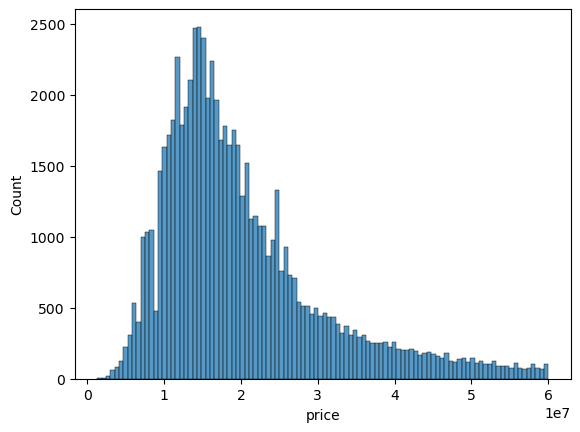

In [103]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

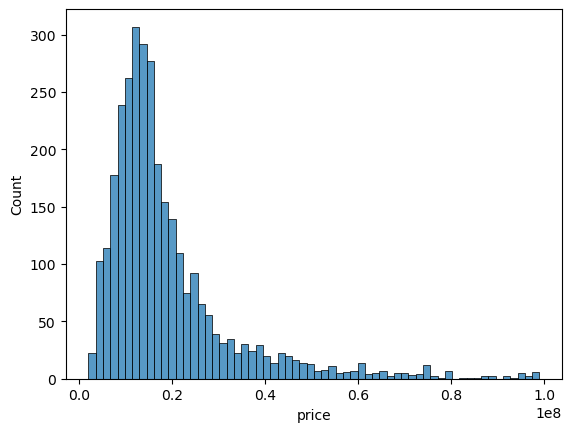

In [104]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

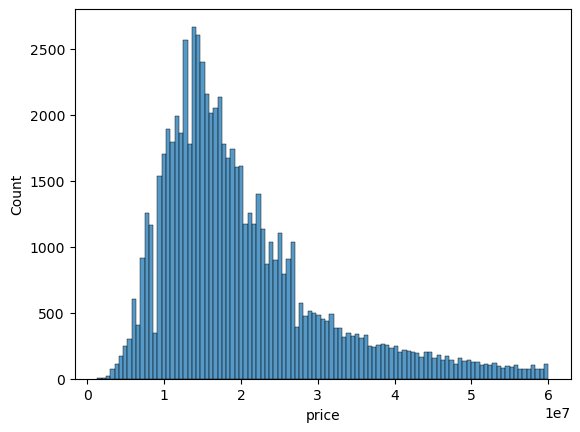

In [105]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

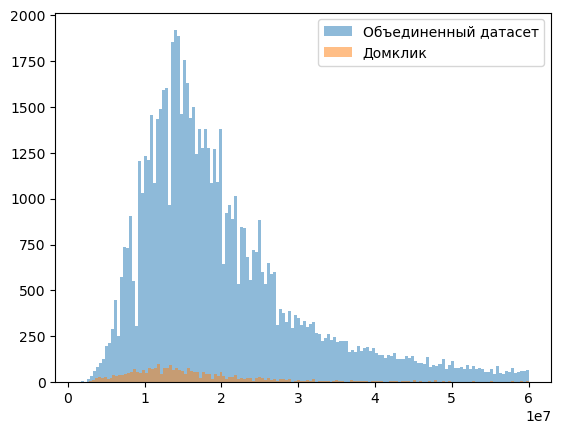

In [106]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

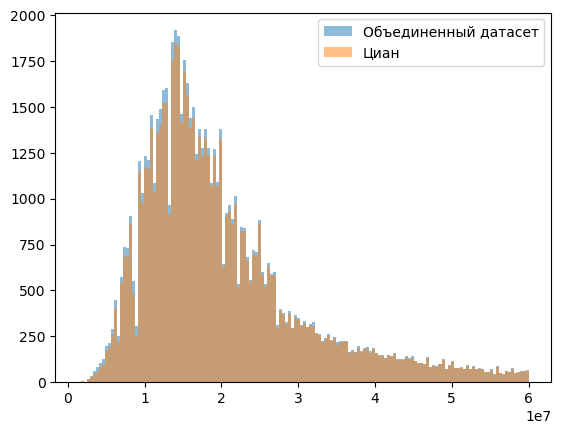

In [107]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

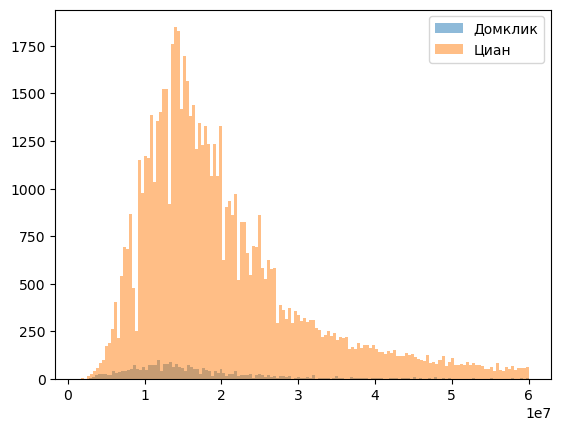

In [108]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [109]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [110]:
df_domclick_prepared['price'].describe()

count         3208.00000
mean      23072163.96509
std       40133400.42271
min        1950000.00000
25%       10661250.00000
50%       14994950.00000
75%       22700000.00000
max     1422120000.00000
Name: price, dtype: float64

In [111]:
df_cian_prepared['price'].describe()

count       71963.00000
mean     23048088.23349
std      16782998.22987
min       1300000.00000
25%      13200000.00000
50%      17929455.00000
75%      26000000.00000
max     111522400.00000
Name: price, dtype: float64

In [112]:
df_combined['price'].describe()

count        74982.00000
mean      23052072.41011
std       18384914.98089
min        1300000.00000
25%       13000000.00000
50%       17800000.00000
75%       26000000.00000
max     1422120000.00000
Name: price, dtype: float64

In [113]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [114]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_9428\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


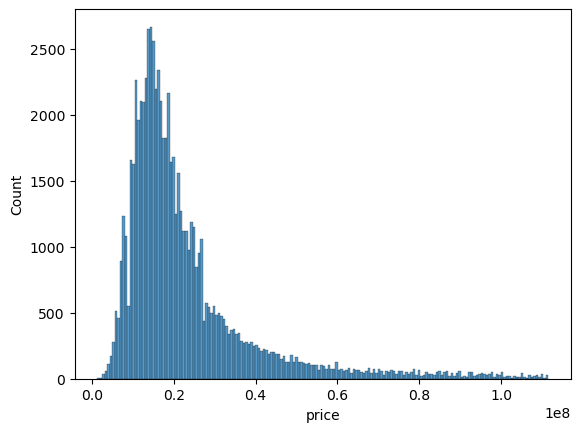

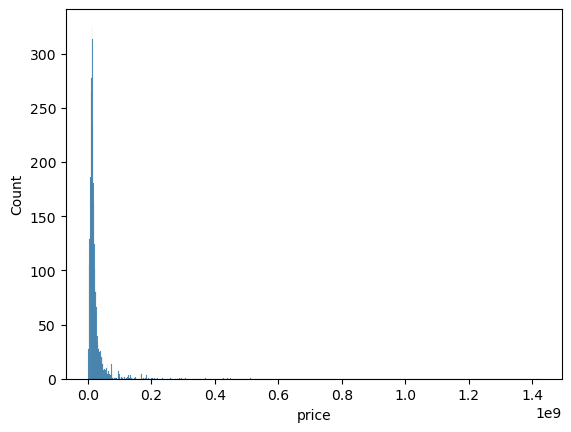

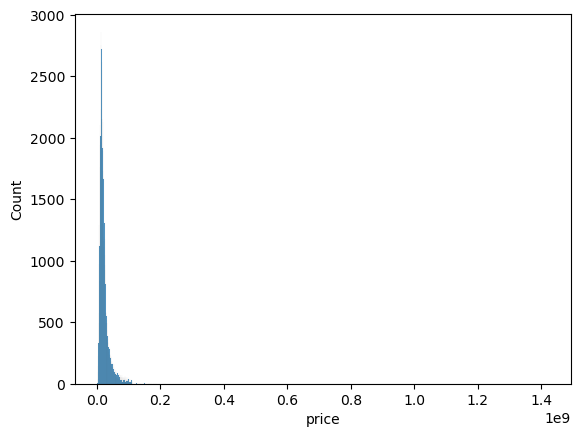

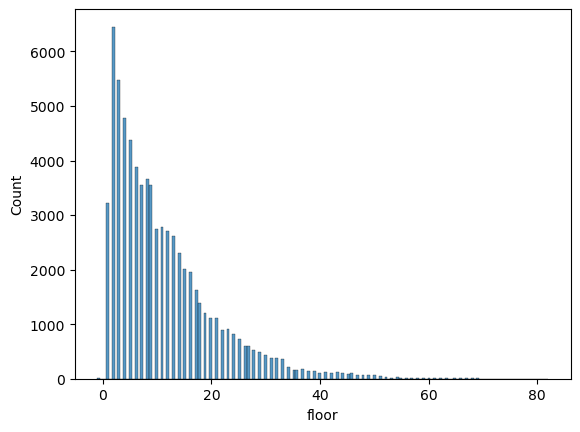

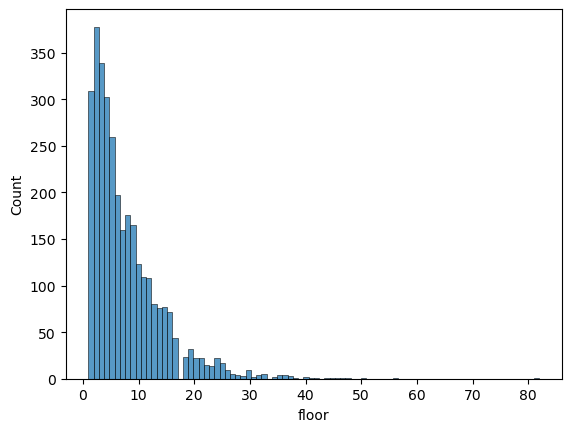

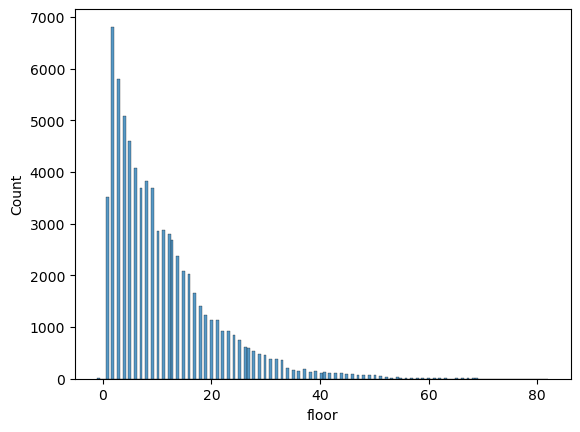

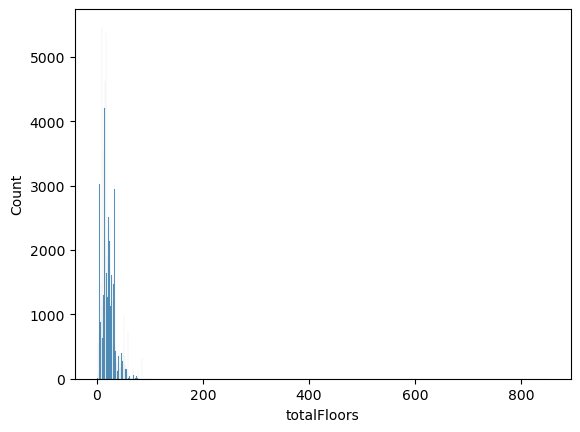

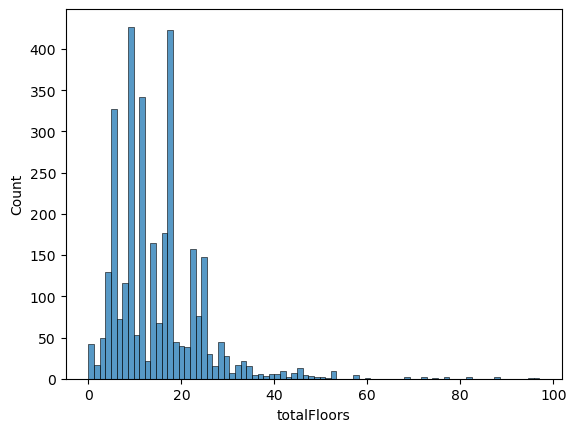

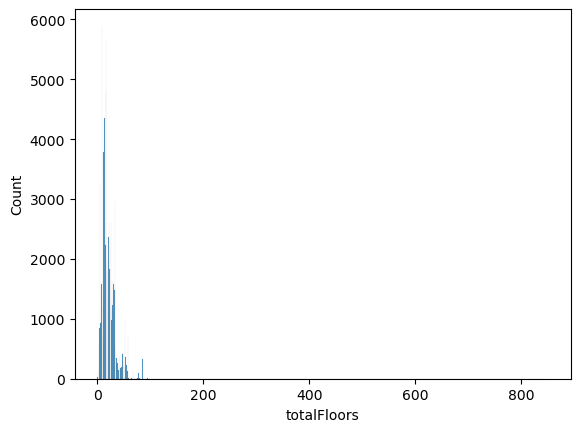

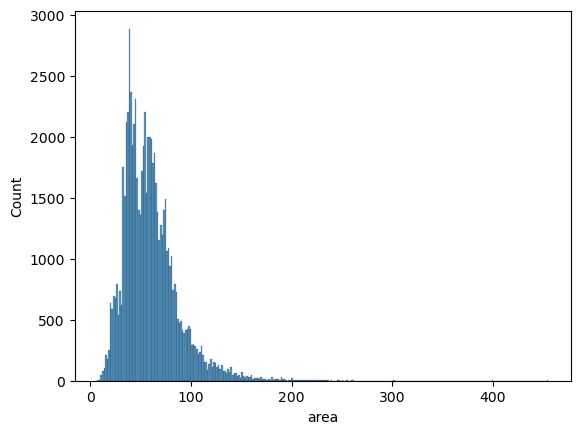

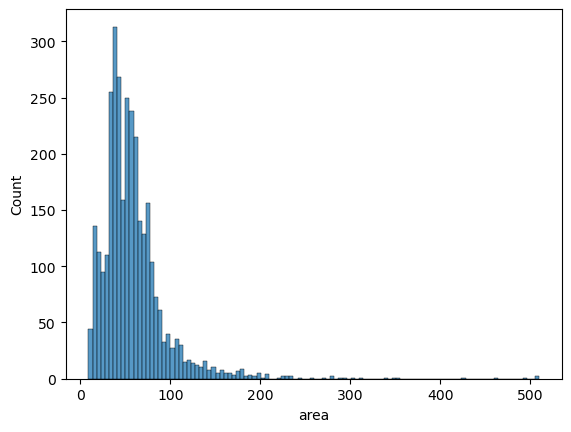

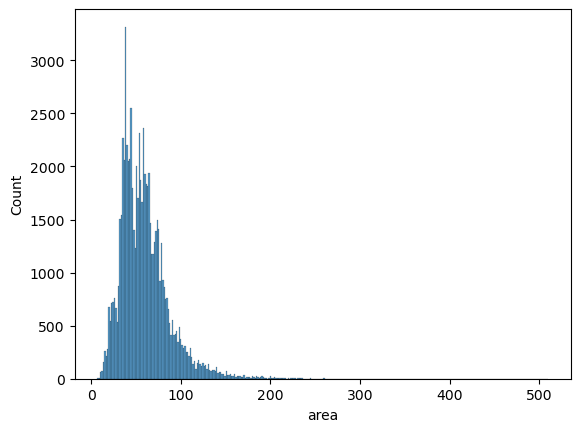

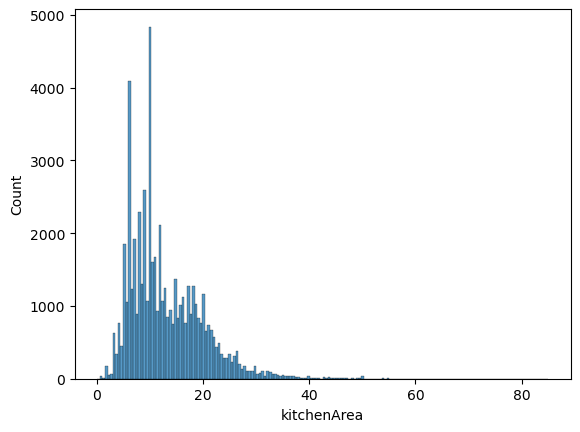

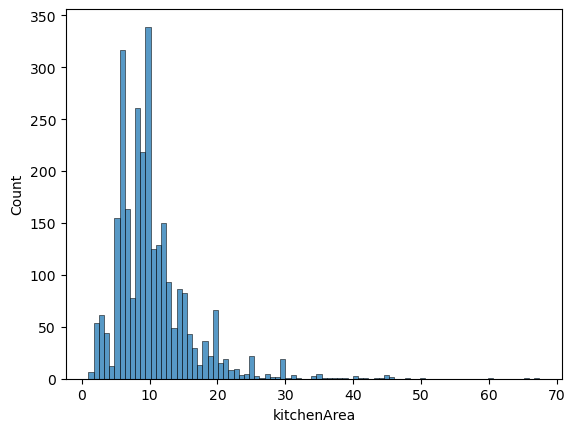

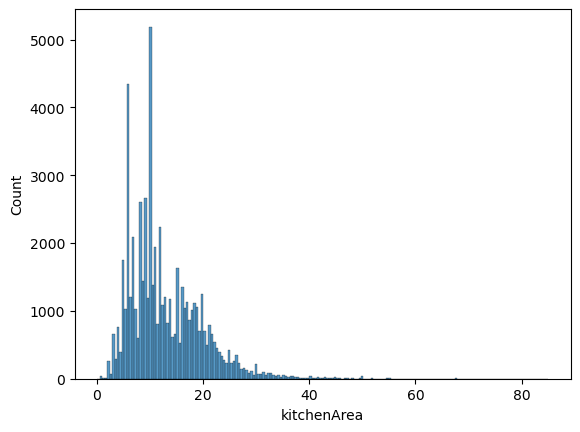

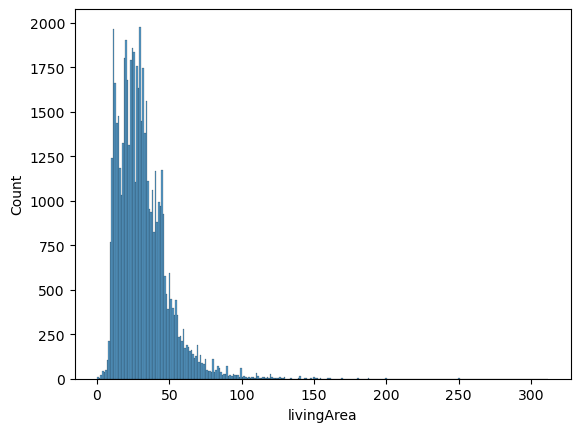

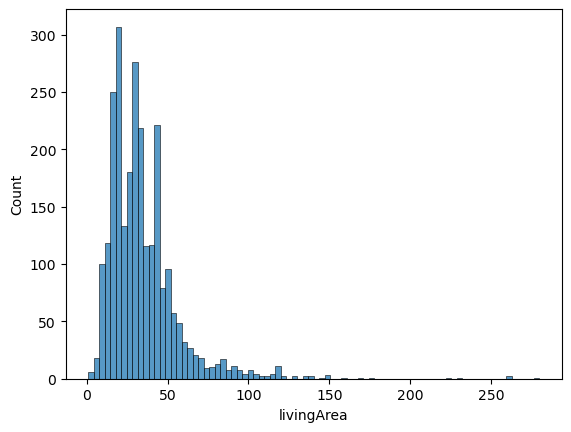

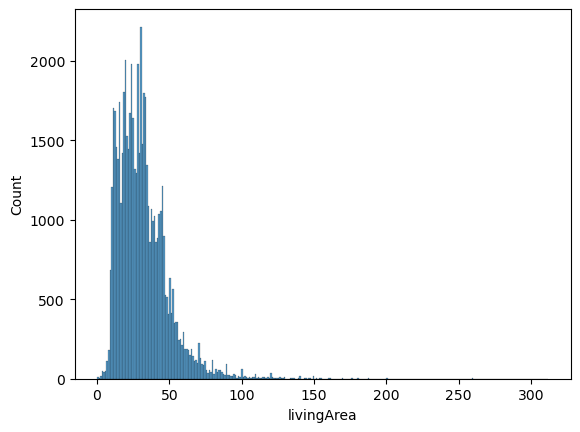

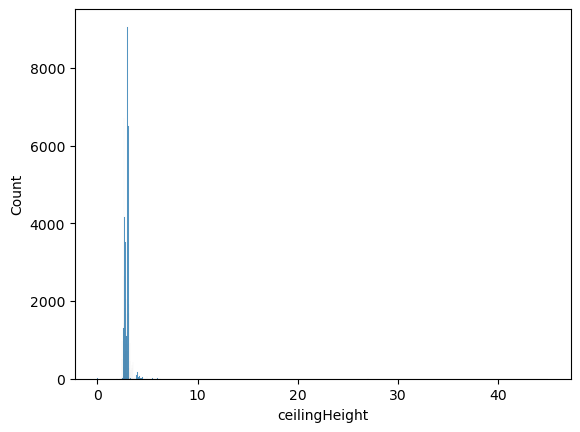

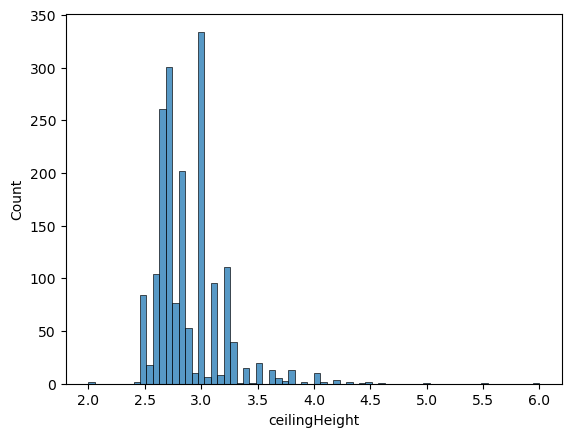

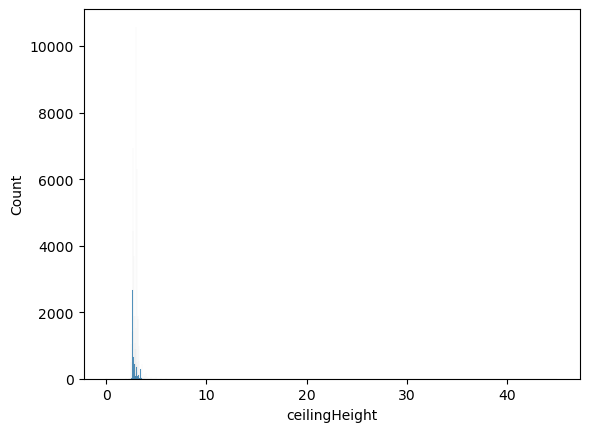

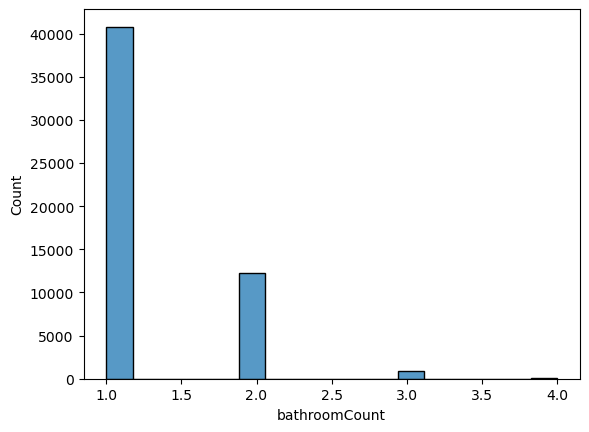

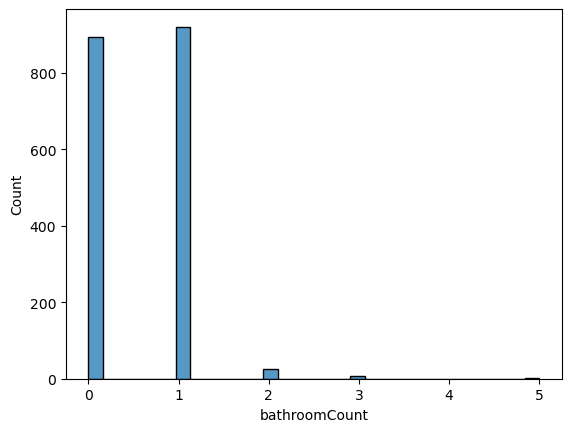

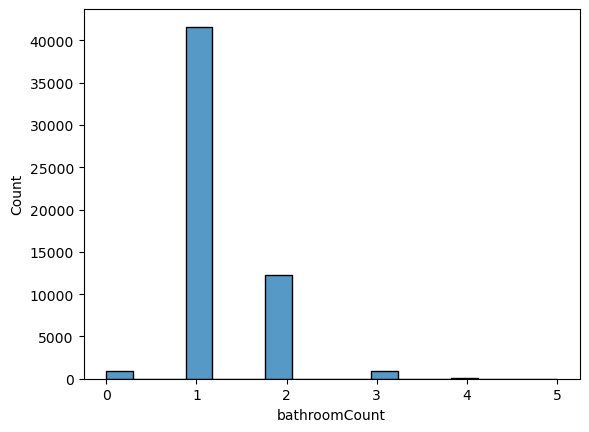

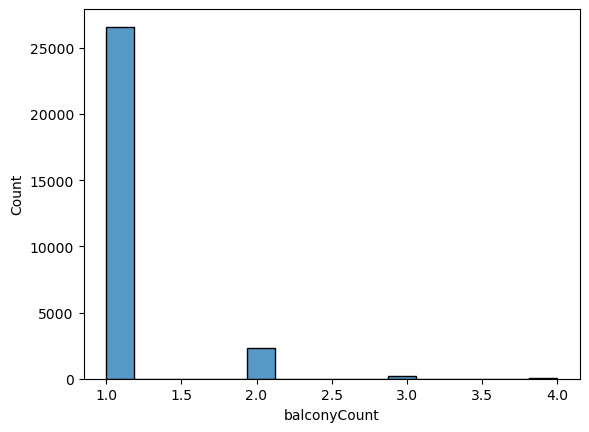

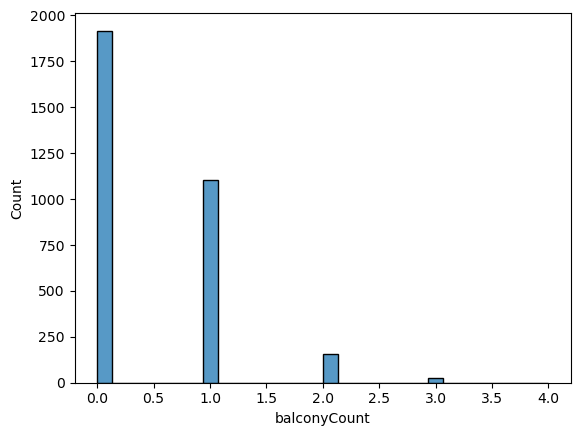

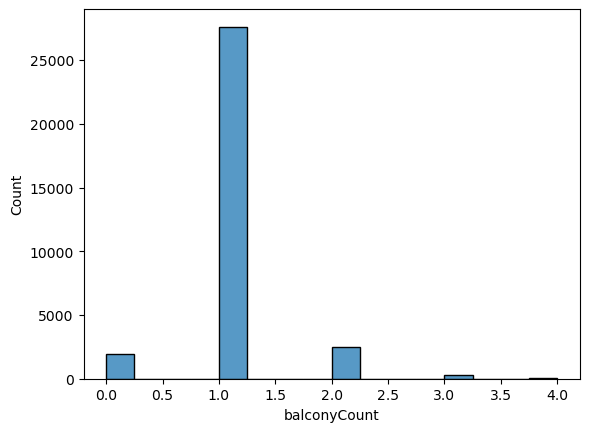

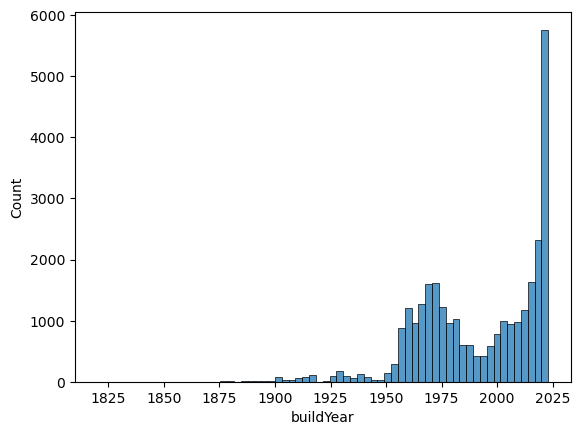

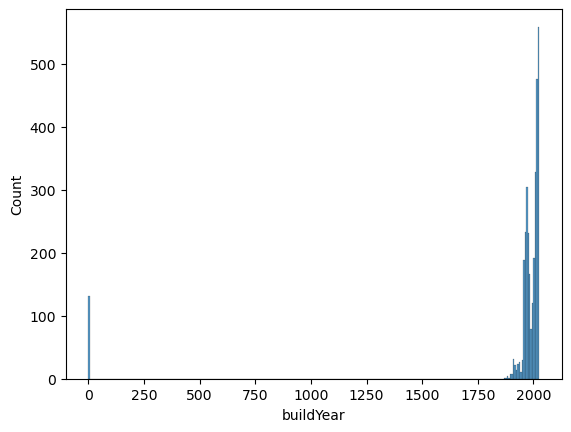

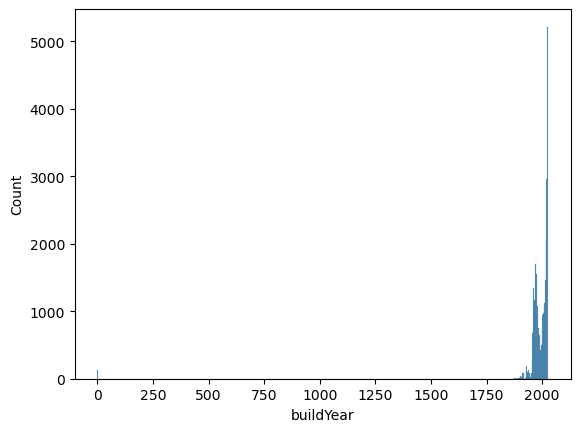

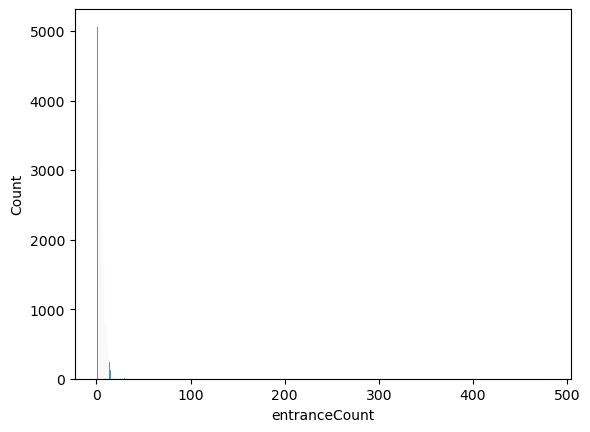

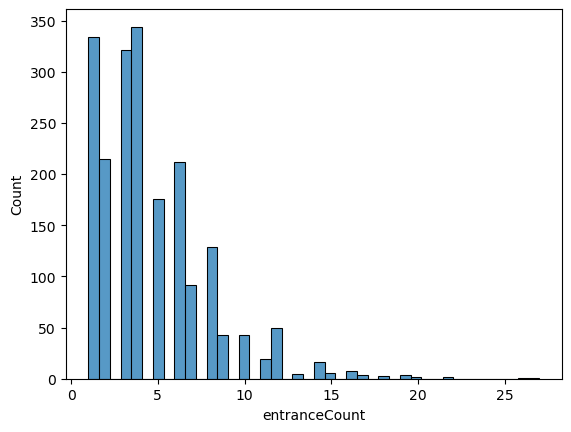

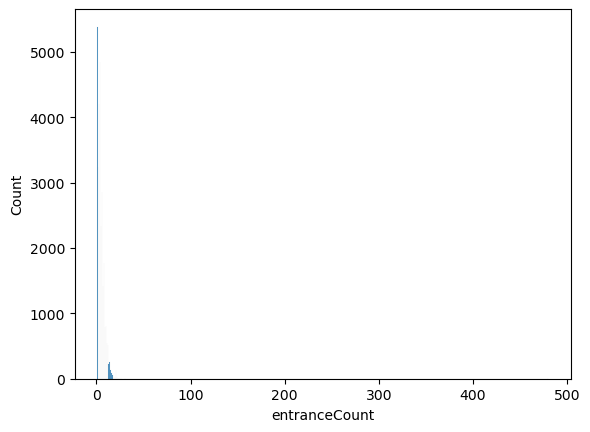

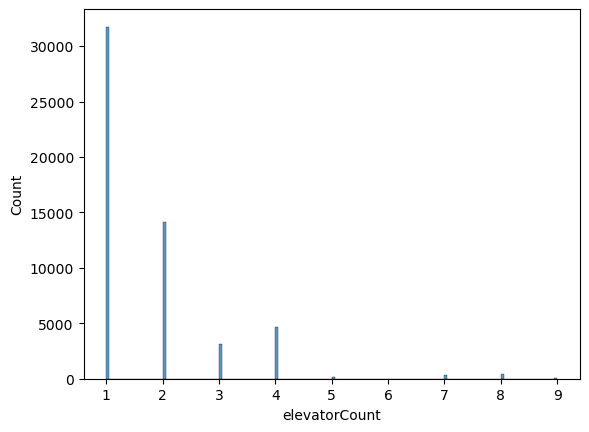

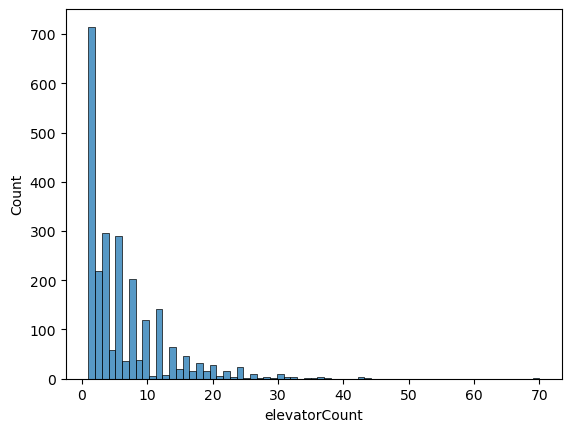

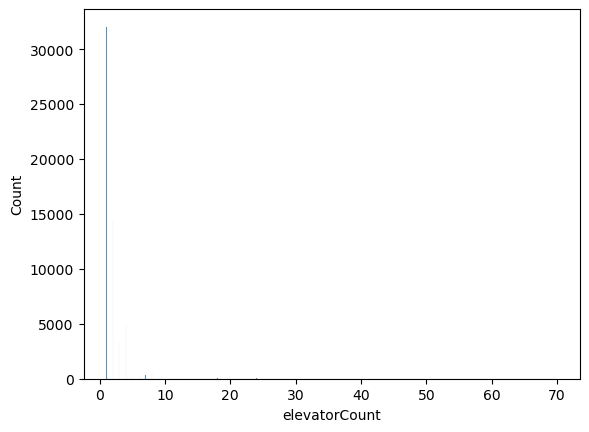

<Figure size 640x480 with 0 Axes>

In [115]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

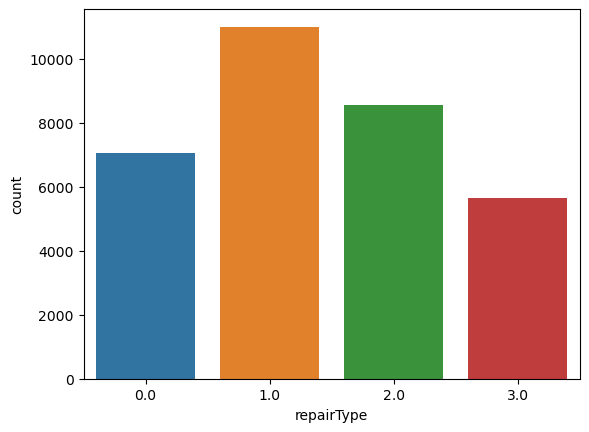

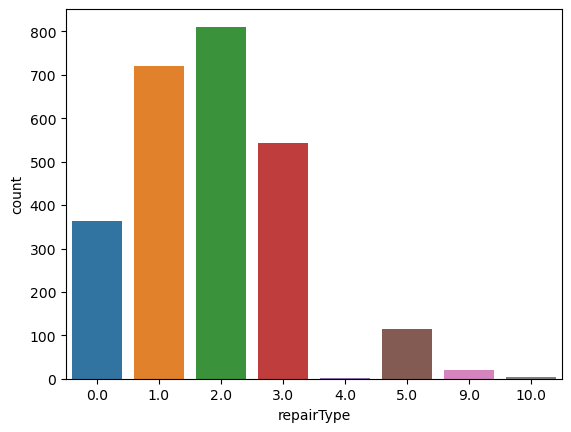

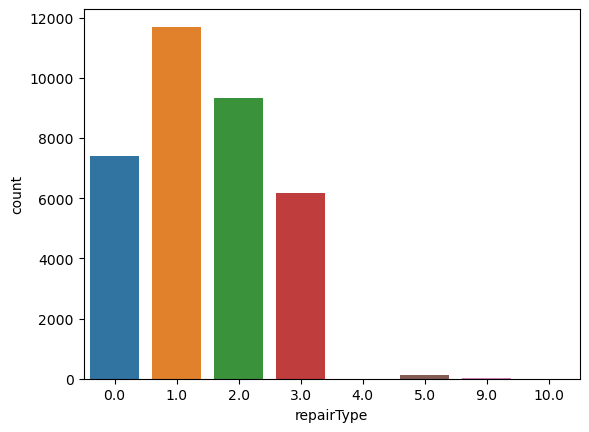

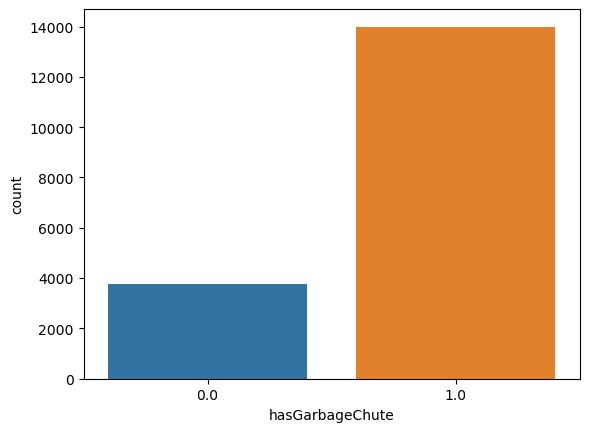

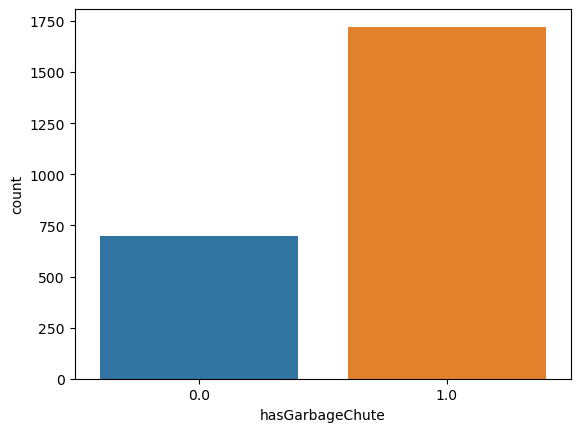

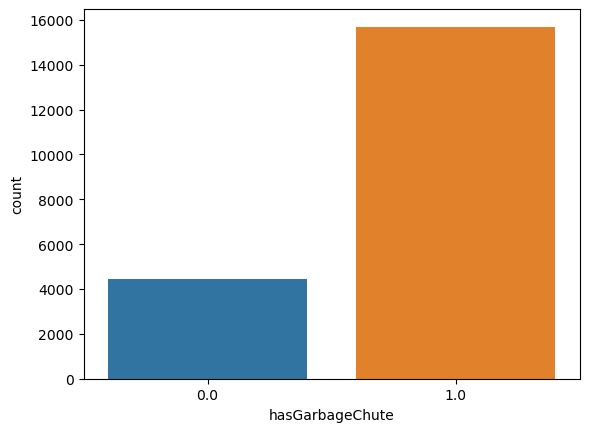

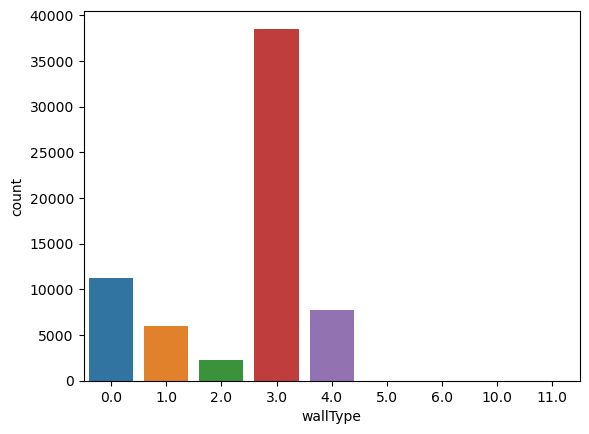

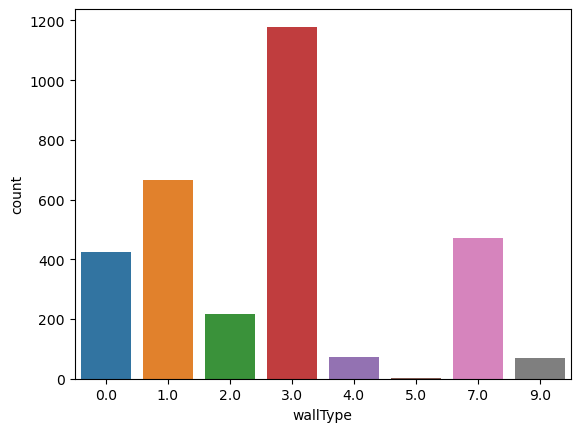

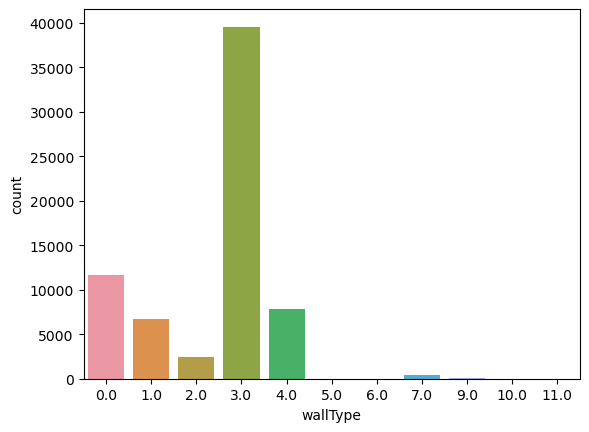

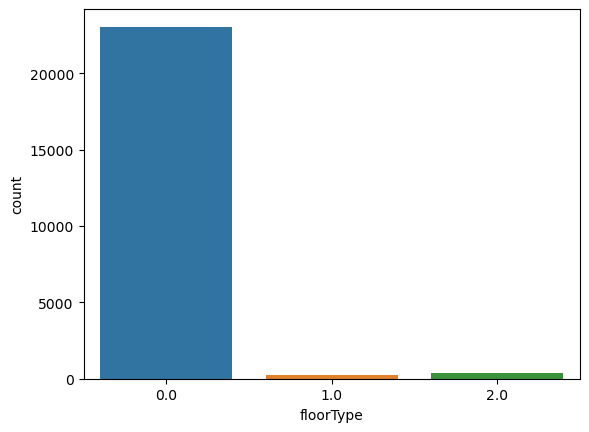

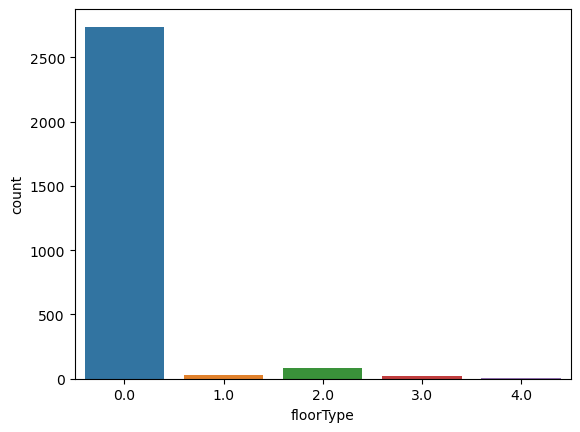

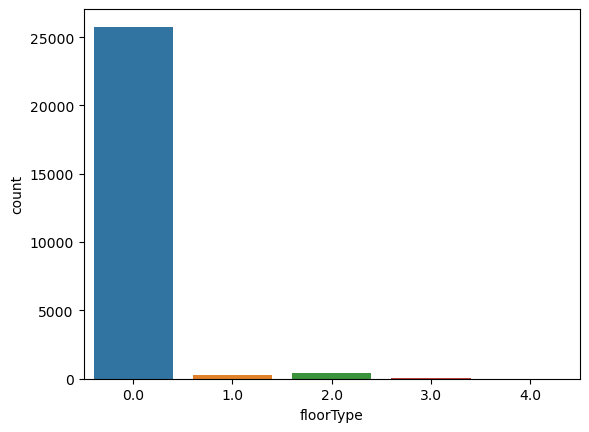

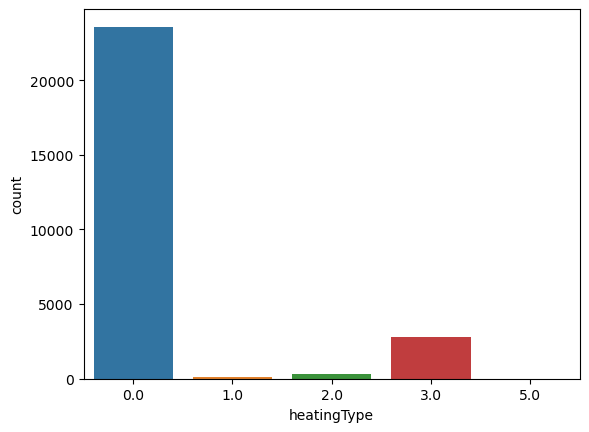

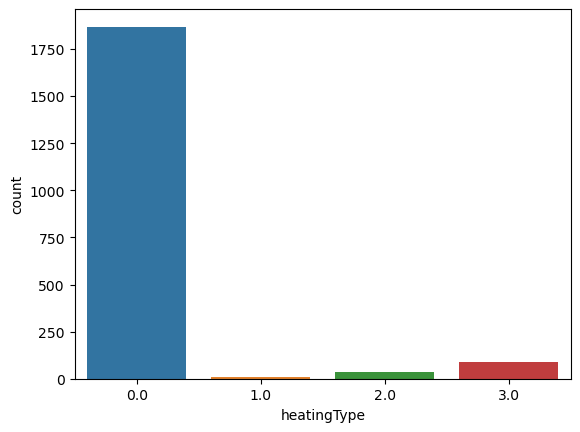

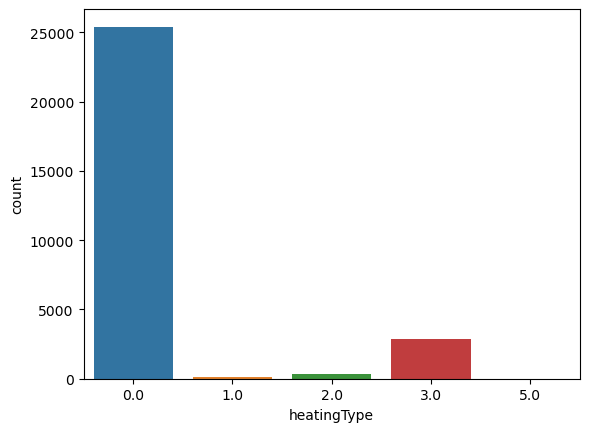

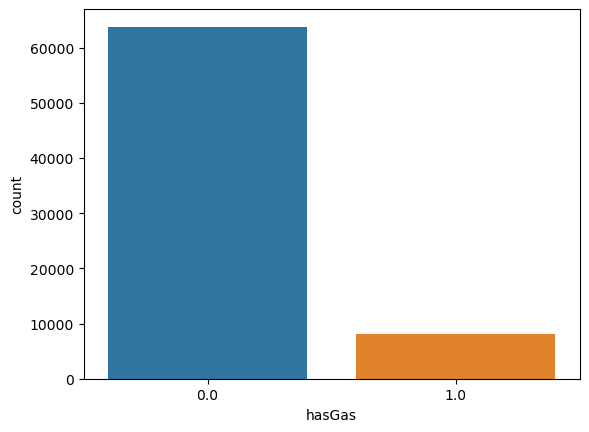

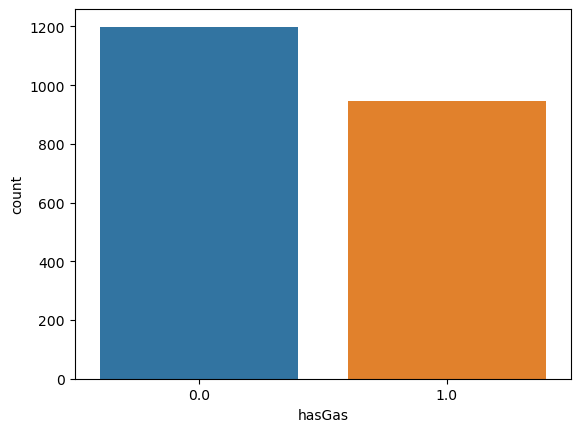

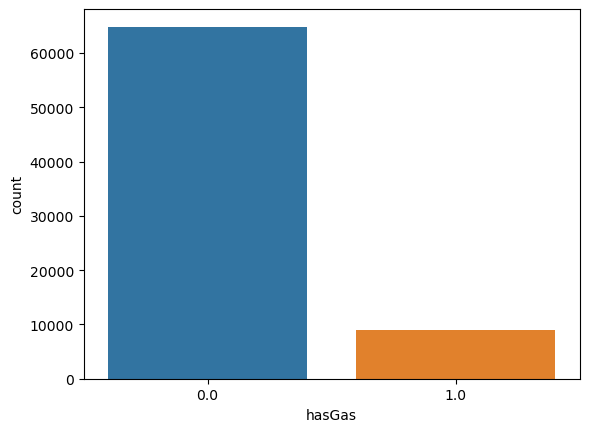

<Figure size 640x480 with 0 Axes>

In [116]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [117]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [118]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3209 non-null   float64
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3209 non-null   float64
 5   house_ceilingHeight            3209 non-null   float64
 6   house_hasGarbageDisposer       3209 non-null   float64
 7   house_liftsFreight             3209 non-null   float64
 8   house_liftsPassenger           3209 non-null   float64
 9   house_wallType                 3209 non-null   float64
 10  house_areaNonResidential       3209 non-null   float64
 11  house_basementArea             3209 non-null   float64
 12  house_chuteCount               3209 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,55.75048,37.53953,68000000.00000,75,2018.00000,3.20000,1.00000,2.00000,1.00000,3.00000,37480.60000,54198.00000,16.00000,1.00000,8.00000,1.00000,36.00000,0.00000,10.00000,0.00000,0.00000,6.00000,2.00000,11489.00000,0.00000,1.00000,2.00000,0.00000,108.00000,15.00000,80.00000,50,2.00000,2.00000,0,0.00000,3.00000
1,55.77631,37.60132,30500000.00000,6,0.00000,3.00000,0.00000,0.00000,1.00000,1.00000,136.00000,0.00000,4.00000,1.00000,1.00000,1.00000,1.00000,10.00000,3.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,2.00000,2.00000,39.20000,8.00000,15.00000,2,1.00000,1.00000,0,0.00000,5.00000
2,55.74933,37.57918,104900000.00000,7,2015.00000,3.30000,1.00000,1.00000,1.00000,1.00000,4972.00000,2080.50000,4.00000,1.00000,3.00000,1.00000,2.00000,6.00000,1.00000,0.00000,0.00000,1.00000,0.00000,2900.00000,0.00000,1.00000,0.00000,4.00000,110.00000,20.00000,57.80000,5,3.00000,2.00000,1,0.00000,5.00000
3,55.74029,37.61733,205875000.00000,6,2021.00000,3.80000,0.00000,0.00000,1.00000,3.00000,4260.00000,3465.00000,7.00000,1.00000,2.00000,1.00000,5.00000,0.00000,5.00000,0.00000,0.00000,6.00000,3.00000,1356.80000,80.00000,1.00000,2.00000,3.00000,152.50000,19.00000,120.00000,3,1.00000,1.00000,0,0.00000,3.00000
4,55.71801,37.52514,295544000.00000,12,2021.00000,3.50000,0.00000,0.00000,1.00000,3.00000,7802.50000,0.00000,7.00000,1.00000,4.00000,1.00000,1.00000,3.00000,2.00000,0.00000,0.00000,5.00000,0.00000,991.00000,80.00000,1.00000,1.00000,5.00000,191.00000,20.00000,140.00000,8,1.00000,1.00000,1,0.00000,5.00000


In [119]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [120]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 71963 entries, 0 to 106564
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                71963 non-null  int64  
 1   price_for_metr       71963 non-null  int64  
 2   floor_object         71963 non-null  int64  
 3   total_floors         71963 non-null  int64  
 4   type_of_home         71963 non-null  float64
 5   square_home          71963 non-null  float64
 6   live_square          71963 non-null  float64
 7   kitchen_square       71963 non-null  float64
 8   height_ceiling       71963 non-null  float64
 9   bathroom             71963 non-null  float64
 10  balcony              71963 non-null  float64
 11  repair               71963 non-null  float64
 12  yer_home             71963 non-null  float64
 13  garbage_chute        71963 non-null  float64
 14  type_home            71963 non-null  float64
 15  type_of_overlap      71963 non-null  flo

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1300000,91549,1,5,1.00000,14.20000,4.20000,4.00000,2.60000,1.00000,1.00000,0.00000,1956.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,4.00000,1.00000,1
5,1550000,86111,1,3,1.00000,18.00000,15.00000,4.00000,3.90000,1.00000,1.00000,2.00000,2011.00000,0.00000,3.00000,1.00000,4.00000,0.00000,0.00000,3.00000,1.00000,0
9,1800000,120000,1,2,1.00000,15.00000,11.00000,4.00000,3.60000,1.00000,1.00000,0.00000,1965.00000,0.00000,1.00000,2.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0
10,1800000,144000,1,5,1.00000,12.50000,4.50000,3.00000,2.80000,1.00000,1.00000,0.00000,1961.00000,0.00000,1.00000,0.00000,4.00000,0.00000,1.00000,6.00000,1.00000,0
17,2069000,99952,1,16,1.00000,20.70000,19.00000,5.50000,2.70000,1.00000,1.00000,0.00000,2001.00000,1.00000,3.00000,0.00000,5.00000,3.00000,0.00000,6.00000,2.00000,0


In [121]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [122]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74983 entries, 0 to 74982
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            74983 non-null  float64
 1   room_count       74983 non-null  float64
 2   floor            74983 non-null  int64  
 3   totalFloors      74983 non-null  int64  
 4   area             74983 non-null  float64
 5   kitchenArea      74983 non-null  float64
 6   livingArea       74983 non-null  float64
 7   ceilingHeight    74983 non-null  float64
 8   bathroomCount    74983 non-null  float64
 9   balconyCount     74983 non-null  float64
 10  repairType       74983 non-null  float64
 11  buildYear        74983 non-null  float64
 12  hasGarbageChute  74983 non-null  float64
 13  wallType         74983 non-null  float64
 14  floorType        74983 non-null  float64
 15  entranceCount    74983 non-null  float64
 16  heatingType      74983 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,68000000.00000,0.00000,50,75,108.00000,15.00000,80.00000,3.20000,2.00000,0.00000,3.00000,2018.00000,1.00000,3.00000,0.00000,8.00000,3.00000,0.00000,5.00000
1,30500000.00000,2.00000,2,6,39.20000,8.00000,15.00000,3.00000,1.00000,0.00000,5.00000,0.00000,0.00000,0.00000,2.00000,1.00000,0.00000,1.00000,1.00000
2,104900000.00000,4.00000,5,7,110.00000,20.00000,66.00000,3.40000,2.00000,1.00000,5.00000,2015.00000,1.00000,3.00000,0.00000,8.00000,0.00000,0.00000,2.00000
3,205875000.00000,3.00000,3,6,152.50000,19.00000,92.00000,3.70000,2.00000,0.00000,3.00000,2021.00000,1.00000,3.00000,0.00000,5.00000,0.00000,0.00000,5.00000
4,295544000.00000,5.00000,8,12,191.00000,20.00000,100.00000,4.00000,2.00000,1.00000,5.00000,2021.00000,1.00000,3.00000,0.00000,1.00000,0.00000,0.00000,1.00000


In [123]:
combined_imputation['heatingType'].unique()

array([3., 0., 2., 1., 5.])

In [124]:
combined_imputation['repairType'].unique()

array([ 3.,  5.,  1.,  2.,  0.,  9.,  4., 10.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [125]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [126]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [127]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [128]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1863799574943579.5
MAE:  10193394.009872707
RMSE:  43171745.099585444
R2:  0.46333913503520496


In [129]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  16133553008802.826
MAE:  2462600.714723755
RMSE:  4016659.434007671
R2:  0.9429224906404828


In [130]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  175823091683722.84
MAE:  6111876.993801103
RMSE:  13259830.002067253
R2:  0.5654141053320101


## Случайный лес

In [131]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1881217100033472.5
MAE:  6818651.742652553
RMSE:  43372999.6660765
R2:  0.45832394766959406


In [132]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  156928682216.3909
MAE:  84842.26714012685
RMSE:  396142.24997643323
R2:  0.9994448155144068


In [133]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  138506101736862.61
MAE:  3744644.151413572
RMSE:  11768861.53104295
R2:  0.6576513496386065


## Дерево решений

In [134]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2279205878396334.0
MAE:  8679071.419676214
RMSE:  47741029.29762129
R2:  0.34372739720683254


In [135]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  406588265084.6252
MAE:  218841.91084131808
RMSE:  637642.7409487425
R2:  0.9985615663522366


In [136]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  206567753393737.12
MAE:  5087956.470678189
RMSE:  14372465.111933203
R2:  0.48942183271547657


## Метод k-ближайших соседей

In [137]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3440176412541951.5
MAE:  15554865.047571605
RMSE:  58653017.07961792
R2:  0.009438528688291425


In [138]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  85924045260857.77
MAE:  5223810.906253126
RMSE:  9269522.385800563
R2:  0.6960167115756662


In [139]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  177956881668512.34
MAE:  5271200.8196201855
RMSE:  13340048.038463444
R2:  0.560139968580727


## Метод Опорных Векторов

In [140]:
svr_regressor_domclick = SVR()
svr_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = svr_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3597966639293227.0
MAE:  15430581.016443122
RMSE:  59983052.93408486
R2:  -0.03599545504565915


In [141]:
svr_regressor_cian = SVR()
svr_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = svr_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  308585434449479.75
MAE:  10344356.615170363
RMSE:  17566599.968391143
R2:  -0.09171786359710432


In [142]:
svr_regressor_combined = SVR()
svr_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = svr_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  430868245253923.1
MAE:  10423013.37196481
RMSE:  20757366.048078526
R2:  -0.06498674351907119


## Перцептрон

In [143]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3715644544886427.0
MAE:  20459108.86948148
RMSE:  60956087.02079249
R2:  -0.0698795311297542


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [144]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  128895758317666.95
MAE:  7670084.283653297
RMSE:  11353226.779980525
R2:  0.5439907844375923


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [145]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  263648763319945.6
MAE:  8263337.930009935
RMSE:  16237264.650178785
R2:  0.34833341520569483


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [146]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1795764804051018.5
MAE:  6472729.593399751
RMSE:  42376465.21420845
R2:  0.4829290091213114


In [147]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  246873272165.432
MAE:  277304.7180256795
RMSE:  496863.43411991186
R2:  0.9991266082867829


In [148]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  148919828012042.3
MAE:  4138776.8136927546
RMSE:  12203271.201282151
R2:  0.6319115079216411


# Сохранить модель

In [149]:
combined_imputation.to_csv('datasets_18features/combined_moscow_18feature.csv', index=False)

In [150]:
import pickle

rf_pkl_file = "models_18features/rf_model_moscow_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_moscow_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [151]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [152]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  140218202939396.6
MAE:  3779727.0930076633
RMSE:  11841376.733277114
R2:  0.6534195105454583


In [153]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  152670975248052.78
MAE:  4213815.815280593
RMSE:  12356009.68144865
R2:  0.6226397128349899


In [154]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_moscow_10feature.csv', index=False)

In [155]:
rf_pkl_file = "models_10features/rf_model_moscow_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_moscow_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [156]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74983 entries, 0 to 74982
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                74983 non-null  float64
 1   room_count           74983 non-null  float64
 2   floor                74983 non-null  int64  
 3   totalFloors          74983 non-null  int64  
 4   area                 74983 non-null  float64
 5   kitchenArea          74983 non-null  float64
 6   livingArea           74983 non-null  float64
 7   ceilingHeight        74983 non-null  float64
 8   bathroomCount        74983 non-null  float64
 9   balconyCount         74983 non-null  float64
 10  buildYear            74983 non-null  float64
 11  entranceCount        74983 non-null  float64
 12  elevatorCount        74983 non-null  float64
 13  repairType_0.0       74983 non-null  bool   
 14  repairType_1.0       74983 non-null  bool   
 15  repairType_2.0       74983 non-null 

In [157]:
combined_ohe.to_csv('datasets_18features_ohe/combined_moscow_18feature_ohe.csv', index=False)

In [158]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [159]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  137572506484408.33
MAE:  3745410.3830087665
RMSE:  11729130.678972263
R2:  0.6599589380455688


In [160]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  142014672618933.53
MAE:  4120757.976154913
RMSE:  11916990.921324626
R2:  0.6489791359880033


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
# fit the model
model.fit(X_train_combined, y_train_combined)

In [245]:
rf_pkl_file = "models_18features_ohe/rf_model_moscow_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_moscow_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [246]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_moscow_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74983 entries, 0 to 74982
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            74983 non-null  float64
 1   room_count       74983 non-null  float64
 2   floor            74983 non-null  int64  
 3   totalFloors      74983 non-null  int64  
 4   area             74983 non-null  float64
 5   kitchenArea      74983 non-null  float64
 6   livingArea       74983 non-null  float64
 7   ceilingHeight    74983 non-null  float64
 8   buildYear        74983 non-null  float64
 9   repairType_0.0   74983 non-null  bool   
 10  repairType_1.0   74983 non-null  bool   
 11  repairType_2.0   74983 non-null  bool   
 12  repairType_3.0   74983 non-null  bool   
 13  repairType_4.0   74983 non-null  bool   
 14  repairType_5.0   74983 non-null  bool   
 15  repairType_9.0   74983 non-null  bool   
 16  repairType_10.0  74983 non-null  bool   
 17  heatingType_

In [247]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [248]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  137302207727354.19
MAE:  3794815.514439324
RMSE:  11717602.473516252
R2:  0.6606270415696118


In [249]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  149902729198079.03
MAE:  4202565.092766457
RMSE:  12243477.006066497
R2:  0.629482048928437


In [250]:
rf_pkl_file = "models_10features_ohe/rf_model_moscow_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_moscow_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)